# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг  компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Цель проекта  

Выявить определяющие успешность игры закономерности и отработать принцип работы с данными

## Изучение данных

### Загрузка необходимых библиотек

In [4]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats as st

from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

%matplotlib inline

### Загрузка данных в датафрейм и получение общей информации

In [5]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [8]:
# Количество и доля строк с пропусками

print(f'{"column":<15} {"NaN":>7} {"%":>7} \n')

for col in df.columns:
    
    print(f'{col:<15} {sum(df[col].isna()):>7} {sum(df[col].isna()) / len(df[col]):>7.0%}')

column              NaN       % 

Name                  2      0%
Platform              0      0%
Year_of_Release     269      2%
Genre                 2      0%
NA_sales              0      0%
EU_sales              0      0%
JP_sales              0      0%
Other_sales           0      0%
Critic_Score       8578     51%
User_Score         6701     40%
Rating             6766     40%


In [9]:
# Найдем явные дубликаты

df.duplicated().sum()

0

### Выводы

Явных дубликатов нет. Значительные пропуски (почти половина) в оценках пользователей и критиков, а также в рейтингах. При этом оценках пользователей и ретингах - почти одинаковое. Названия колонок следует привести к нижнему регистру.

## Предобработка данных

### Переименование колонок (приведение к нижнему регистру)

In [10]:
df = df.rename(columns = {"Name": "name",
                          "Platform": "platform",
                          "Year_of_Release": "year_of_release",
                          "Genre": "genre", 
                          "NA_sales": "na_sales",
                          "EU_sales": "eu_sales",
                          "JP_sales": "jp_sales",
                          "Other_sales": "other_sales",
                          "Critic_Score": "critic_score",
                          "User_Score": "user_score",
                          "Rating": "rating",
                         })

### Обработка пропусков и перевод в нужный тип данных

In [11]:
# Функции для вывода инфо и гистограммы по колонкам  

def column_info(df: pd.DataFrame, col: str):
    
    print(f'Количество пропусков: {sum(df[col].isna())}')
    print(f'Доля пропусков: {sum(df[col].isna()) / len(df[col]):.0%}')
    print(f'Тип переменной: {df.dtypes[col]}')
    

def column_hist(x: pd.Series):
    sns.set()
    plt.figure()
    plt.hist(x, edgecolor='gray')
    plt.title(f'Гистограмма распределения значений {x.name}')
    plt.xlabel(x.name)
    plt.ylabel('Частота')
    #plt.grid()

#### name

In [12]:
df['name'].sort_values(ascending=False).to_frame()

,name
9134,¡Shin Chan Flipa en colores!
475,wwe Smackdown vs. Raw 2006
8280,uDraw Studio: Instant Artist
15612,uDraw Studio: Instant Artist
645,uDraw Studio
...,...
3358,Frozen: Olaf's Quest
1079,Fire Emblem Fates
14983,Beyblade Burst
659,NaN


In [13]:
column_info(df, 'name')

Количество пропусков: 2
Доля пропусков: 0%
Тип переменной: object


In [14]:
# Выведем 2 строки с пропусками в name

df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
# Посмотрим, с чем связаны повторы в играх

df[df['name'].isin(['uDraw Studio: Instant Artist'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.0,0.02,NaN,tbd,E
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.0,0.00,54.0,5.7,E


Видим, что повтор связан с версиями игры под разные платформы 

In [16]:
# Сделаем сабсет с колонками name и platform и поищем неявные дубликаты

df_sbs = df[['name', 'platform']]

df_sbs.duplicated().sum()

5

In [17]:
df_sbs[df_sbs.duplicated()]

,name,platform
1591,Need for Speed: Most Wanted,X360
4127,Sonic the Hedgehog,PS3
11715,Need for Speed: Most Wanted,PC
14244,NaN,GEN
16230,Madden NFL 13,PS3


In [18]:
df[df['name'].isin(['Need for Speed: Most Wanted'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Видим, что здесь дубликаты связаны с релизами в разные годы, поэтому их оставим

In [19]:
# Сделаем сабсет с колонками name и platform и поищем неявные дубликаты

df_sbs = df[['name', 'platform', 'year_of_release']]

df_sbs.duplicated().sum()

2

In [20]:
# Выведем дубликаты и получим индексы их строк

df[df_sbs.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [21]:
# Ищем дубликат в строке с Madden NFL 13, PS3, 2012.0

df[df['name'].isin(['Madden NFL 13'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Этот дубликат нужно убрать

Создадим датафрейм df_good на основе df, где будем отсекать пропуски и аномалии

In [22]:
df_good = df.copy(deep=True)

In [23]:
# Отсечем пропуск и неявный дубликат в name

df_good = df_good[df_good['name'].notna()].copy()
df_good = df_good[~df_sbs.duplicated()].copy()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [24]:
# Убеждаемся, что операция проведена

df_good[df_good['name'].isin(['Madden NFL 13'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


In [25]:
df_good['name'].sort_values(ascending=False).to_frame()

,name
9134,¡Shin Chan Flipa en colores!
475,wwe Smackdown vs. Raw 2006
8280,uDraw Studio: Instant Artist
15612,uDraw Studio: Instant Artist
645,uDraw Studio
...,...
13794,Haikyu!! Cross Team Match!
3358,Frozen: Olaf's Quest
3862,Frozen: Olaf's Quest
1079,Fire Emblem Fates


#### platform

In [26]:
df_good['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [27]:
column_info(df_good, 'platform')

Количество пропусков: 0
Доля пропусков: 0%
Тип переменной: object


#### genre

In [28]:
df_good['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [29]:
column_info(df_good, 'genre')

Количество пропусков: 0
Доля пропусков: 0%
Тип переменной: object


#### year_of_release

In [30]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [31]:
column_info(df, 'year_of_release')

Количество пропусков: 269
Доля пропусков: 2%
Тип переменной: float64


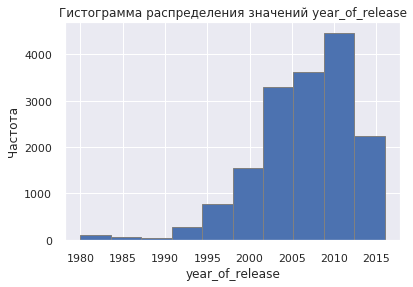

In [32]:
column_hist(df['year_of_release'])

In [33]:
df['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [34]:
# Пороговые значения в 1% и 99% для нахождения выбросов в переменной

print(np.quantile(df[df['year_of_release'].notna()]['year_of_release'], 0.01))

print(np.quantile(df[df['year_of_release'].notna()]['year_of_release'], 0.99))

1987.0
2016.0


In [35]:
# Посмотрим на данные в 1% выбросов слева, до 1987 года

df_sbs = df[(df['year_of_release'].notna()) & (df['year_of_release'] <= 1987)]
df_sbs

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
89,Pac-Man,2600,1982.0,Puzzle,7.28,0.45,0.00,0.08,NaN,NaN,NaN
124,The Legend of Zelda,NES,1986.0,Action,3.74,0.93,1.69,0.14,NaN,NaN,NaN
240,Pitfall!,2600,1981.0,Platform,4.21,0.24,0.00,0.05,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9487,RealSports Volleyball,2600,1981.0,Sports,0.12,0.01,0.00,0.00,NaN,NaN,NaN
11747,Super Football,2600,1987.0,Sports,0.07,0.00,0.00,0.00,NaN,NaN,NaN
11777,Super Baseball,2600,1987.0,Sports,0.07,0.00,0.00,0.00,NaN,NaN,NaN
14470,Alter Ego,PC,1985.0,Simulation,0.00,0.03,0.00,0.01,59.0,5.8,T


In [36]:
df_sbs['name'].value_counts().head(10)

Donkey Kong          2
Mario Bros.          2
Dig Dug              2
Pac-Man              2
Popeye               2
Commando             2
BurgerTime           1
Ghosts 'n Goblins    1
Star Soldier         1
Excitebike           1
Name: name, dtype: int64

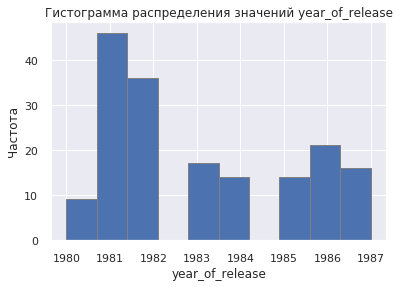

In [37]:
# Распределение количества игр до 1987 года

column_hist(df_sbs['year_of_release'])

In [38]:
# Данные до 1980 года

df[(df['year_of_release'].notna()) & (df['year_of_release'] <= 1980)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
262,Asteroids,2600,1980.0,Shooter,4.00,0.26,0.0,0.05,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN
1968,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN
2650,Boxing,2600,1980.0,Fighting,0.72,0.04,0.0,0.01,NaN,NaN,NaN
4019,Ice Hockey,2600,1980.0,Sports,0.46,0.03,0.0,0.01,NaN,NaN,NaN
5360,Freeway,2600,1980.0,Action,0.32,0.02,0.0,0.00,NaN,NaN,NaN
6300,Bridge,2600,1980.0,Misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN
6875,Checkers,2600,1980.0,Misc,0.22,0.01,0.0,0.00,NaN,NaN,NaN


Выберем пропуски сразу и по году, и по рейтингам

In [39]:
df[df['year_of_release'].isna() & df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16059,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Уберем такие строки как недостаточно информативные

In [40]:
df_good = df_good[~((df_good['year_of_release'].isna()) & (df_good['rating'].isna()))].copy()

df_good.shape

(16624, 11)

In [41]:
# Получим срез данных с пропусками в year_of_release

df_good[df_good['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16329,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M


In [42]:
# Уберем оставшиеся 181 строку с пропусками в годах

df_good = df_good[df_good['year_of_release'].notna()].copy()

In [43]:
# Убедимся в отсутствии пропусков

df_good[df_good['year_of_release'].isna()]['name'].count()

0

In [44]:
# Переводим тип данных в int

df_good['year_of_release'] = df_good['year_of_release'].astype('int')

In [45]:
df_good['year_of_release'].dtypes

dtype('int64')

#### rating

In [46]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [47]:
column_info(df, 'rating')

Количество пропусков: 6766
Доля пропусков: 40%
Тип переменной: object


«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году.

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.


In [48]:
# Ожидаемых к выпуску игр всего 3

df[df['rating'].isin(['RP'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,NaN,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


Находим на сайте esrb.org, что игра Supreme Ruler: Cold War имеет рейтинг E10+ и год выхода 2011, а WRC: FIA World Rally Championship - рейтинг Е и год выхода 2019, - значит на 2017 пропуск в year_of_release означает отсутствие данных. Внесем вместо RP значение Unknown, чтобы показать, что рейтинг в таких строках неизвестен.

In [49]:
# Eбираем строки с RP из данных как ошибочные

df_good.loc[df_good['rating'].isin(['RP']), 'rating'] = 'Unknown'

df_good['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'Unknown'],
      dtype=object)

Очевидно, что рейтинг K-A следует перевести в E, т.к. K-A - устаревшее обозначение Е

In [50]:
df_good.loc[df_good['rating'].isin(['K-A']), 'rating'] = 'E'

df_good['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'Unknown'], dtype=object)

In [51]:
# Срез данных с пропусками в rating

df_good[df_good['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Оставшиеся пропуски в rating практически совпадают с пропусками в critic_score, user_score и составляют внушительную часть всего датафрейма. Заменим их на заглушку Unknown. В этом случае сможем вывести данные на совместные диаграммы 

In [52]:
# Замена всех оставшихся пропусков на значение Unknown

df_good['rating'] = df_good['rating'].fillna('Unknown')

In [53]:
# Провера наличия пропусков

df_good[df_good['rating'].isna()]['name'].count()

0

In [54]:
# Распределение значений rating после замены пропусков

df_good.groupby('rating')['name'].agg(['count'])

,count
rating,
AO,1
E,3923
E10+,1393
EC,8
M,1536
T,2905
Unknown,6677


Заменим совсем редкие рейтинги на близкие по смыслу и возрастным ограничениям: 
* AO (От 18 лет) - на M (От 17 лет), 
* EC (От 3 лет) - на E (От 6 лет)

In [55]:
df_good.loc[df_good['rating'].isin(['AO']), 'rating'] = 'M'
df_good.loc[df_good['rating'].isin(['EC']), 'rating'] = 'E'

df_good.groupby('rating')['name'].agg(['count'])

,count
rating,
E,3931
E10+,1393
M,1537
T,2905
Unknown,6677


#### critic_score

In [56]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Количество пропусков: 8578
Доля пропусков: 51%
Тип переменной: float64


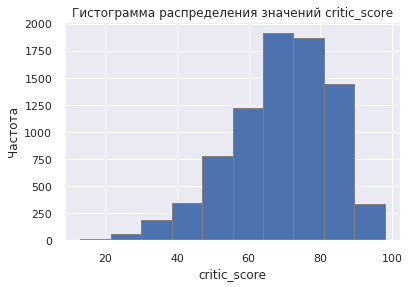

In [57]:
column_info(df, 'critic_score')

column_hist(df['critic_score'])

In [58]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [59]:
# Пороговые значения в 1% и 99% для нахождения выбросов в переменной

print(np.quantile(df[df['critic_score'].notna()]['critic_score'], 0.01))

print(np.quantile(df[df['critic_score'].notna()]['critic_score'], 0.99))

31.0
94.0


In [60]:
# Посмотрим на данные в 1% выбросов слева, до оценки 31 вкл.

df_sbs = df[(df['critic_score'].notna()) & (df['critic_score'] <= 31)]
df_sbs

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
622,Game Party,Wii,2007.0,Misc,1.47,0.77,0.0,0.24,25.0,4.3,E
916,Game Party 2,Wii,2008.0,Misc,1.28,0.43,0.0,0.17,29.0,4.6,E
1050,Deal or No Deal,DS,2007.0,Misc,1.15,0.40,0.0,0.15,20.0,1.9,E
1562,Jillian Michaels' Fitness Ultimatum 2009,Wii,2008.0,Sports,0.96,0.20,0.0,0.11,30.0,2,E
5070,The Golden Compass,PSP,NaN,Action,0.11,0.16,0.0,0.10,28.0,4.1,E10+
...,...,...,...,...,...,...,...,...,...,...,...
15768,Pulse Racer,XB,2003.0,Racing,0.01,0.00,0.0,0.00,24.0,2.8,E
15925,Zoey 101: Field Trip Fiasco,DS,2007.0,Action,0.02,0.00,0.0,0.00,31.0,tbd,E
16157,Aquaman: Battle for Atlantis,XB,NaN,Action,0.01,0.00,0.0,0.00,26.0,2.7,T
16318,Thunder Alley,GBA,2004.0,Racing,0.01,0.00,0.0,0.00,23.0,tbd,E


In [61]:
df_sbs['name'].value_counts().head(10)

Aquaman: Battle for Atlantis           2
Jumper: Griffin's Story                2
Ride to Hell                           2
Batman: Dark Tomorrow                  2
Rogue Warrior                          2
Leisure Suit Larry: Box Office Bust    2
Chicken Shoot                          2
Rugby 15                               2
Cruis'n                                1
Rugby World Cup 2015                   1
Name: name, dtype: int64

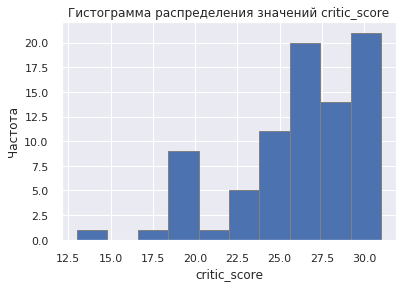

In [62]:
# Распределение количества игр до оценки 31 вкл.

column_hist(df_sbs['critic_score'])

In [63]:
# Срез данных до оценки 15 вкл.

df[(df['critic_score'].notna()) & (df['critic_score'] <= 15)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13689,Ride to Hell,PS3,2013.0,Racing,0.02,0.01,0.0,0.01,13.0,1,M


Оставшиеся пропуски в critic_score практически совпадают с пропусками в rating, user_score и составляют внушительную часть всего датафрейма. Данные с попусками будем учитывать в вопросах, не связанных с рейтингами и оценками.

#### user_score

In [64]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Количество пропусков: 6701
Доля пропусков: 40%
Тип переменной: object


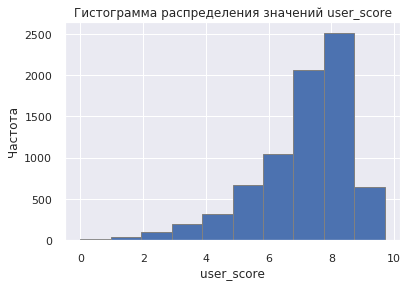

In [65]:
column_info(df, 'user_score')

# Срез данных: Serial колонки user_score без пропусков в user_score и 'tbd', переведенный в float

df_sbs = df[(df['user_score'].notna()) & (~df['user_score'].isin(['tbd']))]['user_score'].astype('float')

column_hist(df_sbs)

In [66]:
df_sbs = df[(df['user_score'].notna()) & (~df['user_score'].isin(['tbd']))].copy()
df_sbs['user_score'] = df_sbs['user_score'].astype('float64')

df_sbs['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [67]:
# Пороговые значения в 1% и 99% для нахождения выбросов в переменной

print(np.quantile(df_sbs['user_score'], 0.01))

print(np.quantile(df_sbs['user_score'], 0.99))

2.3
9.2


In [68]:
# # Посмотрим на данные в 1% выбросов слева, до оценки 2.3 вкл. в user_score

df_sbs = df_sbs[df_sbs['user_score'] <= 2.3]
df_sbs

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1050,Deal or No Deal,DS,2007.0,Misc,1.15,0.40,0.0,0.15,20.0,1.9,E
1351,SimCity (2013),PC,2013.0,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+
1562,Jillian Michaels' Fitness Ultimatum 2009,Wii,2008.0,Sports,0.96,0.20,0.0,0.11,30.0,2.0,E
1884,Sonic Free Riders,X360,2010.0,Racing,0.74,0.25,0.0,0.09,47.0,2.1,E
2127,Cars,DS,2006.0,Racing,0.85,0.04,0.0,0.07,54.0,2.1,E
...,...,...,...,...,...,...,...,...,...,...,...
15799,Myth Makers: Super Kart GP,Wii,2007.0,Racing,0.01,0.00,0.0,0.00,NaN,1.8,E
15816,Without Warning,XB,NaN,Shooter,0.01,0.00,0.0,0.00,45.0,2.0,M
16486,Super Dungeon Bros,PS4,2016.0,Action,0.01,0.00,0.0,0.00,42.0,2.3,E10+
16518,Rugby World Cup 2015,PC,2015.0,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E


In [69]:
df_sbs['name'].value_counts().head(10)

Thrillville: Off the Rails                    2
Madden NFL 17                                 2
Ride to Hell                                  2
Power Gig: Rise of the SixString              2
Tony Hawk's Pro Skater 5                      2
Rugby World Cup 2015                          2
Angry Birds Star Wars                         2
MindJack                                      2
Billy the Wizard: Rocket Broomstick Racing    1
March of the Penguins                         1
Name: name, dtype: int64

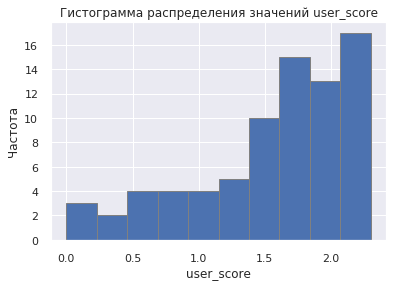

In [70]:
# Распределение количества игр до оценки 2.3 вкл. в user_score

column_hist(df_sbs['user_score'])

In [71]:
# Срез данных до оценки 0.5 вкл. в user_score

df_sbs[df_sbs['user_score'] <= .5]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.00,0.0,0.06,NaN,0.0,E
5764,Happy Feet,DS,2006.0,Action,0.27,0.01,0.0,0.02,NaN,0.3,E
9147,Power Gig: Rise of the SixString,PS3,2010.0,Misc,0.13,0.00,0.0,0.01,36.0,0.5,T
9970,Madden NFL 17,PS3,2016.0,Sports,0.07,0.02,0.0,0.02,NaN,0.2,E
10262,Charlie and the Chocolate Factory,XB,2005.0,Adventure,0.08,0.02,0.0,0.00,39.0,0.5,E
13380,Billy the Wizard: Rocket Broomstick Racing,Wii,2007.0,Racing,0.04,0.00,0.0,0.00,NaN,0.3,E
13682,Myth Makers: Trixie in Toyland,Wii,2008.0,Platform,0.04,0.00,0.0,0.00,NaN,0.2,E


In [72]:
# Срез данных значения 'tbd' в user_score

df[df['user_score'].isin(['tbd'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [73]:
# Срез данных с значениями 'tbd' и пропусками в user_score

df_sbs = df[(df['critic_score'].notna()) & (df['user_score'] == 'tbd')]
df_sbs

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16577,Space Raiders,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,40.0,tbd,T
16669,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,0.01,0.00,0.00,0.00,72.0,tbd,T
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.00,53.0,tbd,E


In [74]:
# Срез данных c пропусками в user_score

df_sbs = df[df['user_score'].isna()]
df_sbs

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


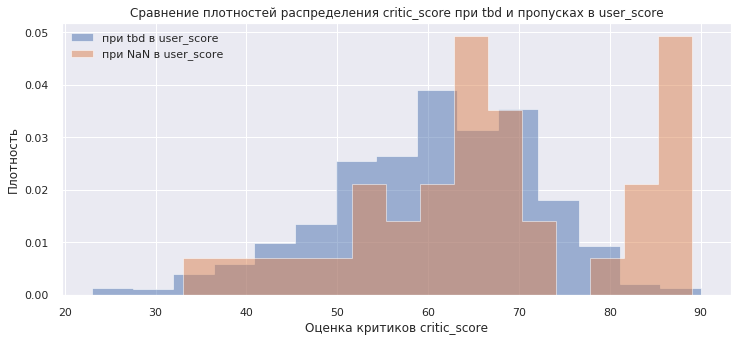

In [75]:
# Сравнение плотностей распределения critic_score при tbd и пропусках в user_score

sns.set()
plt.figure(figsize=(12, 5))
plt.hist(
    df[(df['user_score'] == 'tbd')]['critic_score'], 
    alpha=0.5, 
    density=True, 
    bins=15, 
    #edgecolor='none', 
    histtype='stepfilled'
)
plt.hist(
    df[(df['user_score'].isna())]['critic_score'], 
    alpha=0.5, 
    density=True, 
    bins=15, 
    #edgecolor='none', 
    histtype='stepfilled'
)
#plt.grid()
plt.title('Сравнение плотностей распределения critic_score при tbd и пропусках в user_score')
plt.legend(["при tbd в user_score", "при NaN в user_score"], loc='upper left')
plt.xlabel('Оценка критиков critic_score')
plt.ylabel('Плотность')
plt.show()

<div class="alert alert-success">
<font color='blue'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА ✔️</u>
</font>
    <br />
Классный график! На этот раз с заголовком. Ещё бы оси подписать, было бы вообще отлично)

<div class="alert alert-info">
<font color='blue'> 
<u>КОММЕНТАРИЙ СТУДЕНТА ✔️</u>
</font>
    <br />
Учел

In [76]:
# Срез данных при пропусках в user_score и оценки от 75 в critic_score

df_sbs = df[(df['critic_score'] >= 75) & (df['user_score'].isna())]
df_sbs

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
182,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.20,0.28,85.0,NaN,T
440,Need for Speed III: Hot Pursuit,PS,1998.0,Racing,2.14,0.86,0.00,0.13,88.0,NaN,E
637,Riven: The Sequel to Myst,PC,1997.0,Adventure,1.52,0.82,0.00,0.10,83.0,NaN,E
1981,Monster Rancher 2,PS,1998.0,Simulation,0.19,0.13,0.66,0.07,83.0,NaN,E
2195,MVP Baseball 2005,XB,2005.0,Sports,0.70,0.20,0.00,0.03,86.0,NaN,NaN
6641,Bomberman Tournament,GBA,2001.0,Puzzle,0.10,0.04,0.10,0.01,88.0,NaN,E
9859,Ultimate Card Games,GBA,2003.0,Misc,0.09,0.03,0.00,0.00,87.0,NaN,E
12648,pro evolution soccer 2011,PC,2010.0,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN
15584,Worldwide Soccer Manager 2007,PC,2006.0,Sports,0.00,0.02,0.00,0.00,87.0,NaN,E
16060,Worldwide Soccer Manager 2006,PC,2004.0,Sports,0.00,0.01,0.00,0.00,89.0,NaN,E


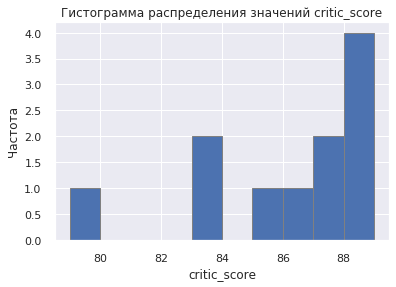

In [77]:
# Распределение количества игр при пропусках в user_score и оценки от 75 в critic_score

column_hist(df_sbs['critic_score'])

In [78]:
# Значению "tbd" присвоим NaN, т.к. оценка пользователей будет определена в будущем, а сейчас ее нет.

df_good.loc[df_good['user_score'].isin(['tbd']),'user_score'] = np.nan

In [79]:
df_good[df_good['user_score'].isin(['tbd'])]['user_score'].count()

0

Переведем user_score в float64

In [80]:
df_good['user_score'] = df_good['user_score'].astype('float')

In [81]:
# Срез данных с пропусками в user_score

df_good[df_good['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown


In [82]:
# Посчитаем строки с пропусками в user_score и без в critic_score

df_good[(df_good['user_score'].isna()) & (~df_good['critic_score'].isna())]['name'].count()

1089

In [83]:
# Теперь посчитаем строки с пропусками в critic_score и без в user_score

df_good[(~df_good['user_score'].isna()) & (df_good['critic_score'].isna())]['name'].count()

569

In [84]:
# Строки с пропусками одновременнно и в critic_score, и в user_score

df_good[(df_good['user_score'].isna()) & (df_good['critic_score'].isna())]['name'].count()

7892

In [85]:
# Строки с пропусками ов critic_score

df_good[df_good['critic_score'].isna()]['name'].count()

8461

In [86]:
# Строки с пропусками ов user_score

df_good[df_good['user_score'].isna()]['name'].count()

8981

Видим, что пересечение в пропусках user_score и critic_score составляет 7892 при 8981 пропусках в user_score и 8461 - в critic_score, то есть доля совместных пропусков очень большая, что не позволяет нам от них отказаться из-за высокой вероятности получить смещенную выборку.

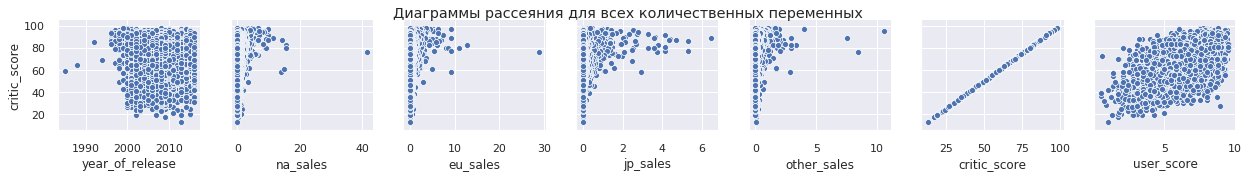

In [87]:
# Диаграммы рассеяния для всех количественных переменных

df_sbs = df[(df['user_score'].notna()) &
            (df['critic_score'].notna()) &
            (~df['user_score'].isin(['tbd']))].copy()

df_sbs.loc[:, 'user_score'] = df_sbs.loc[:, 'user_score'].astype('float64')

d = df_sbs.select_dtypes(['int64', 'float64'])

sns.pairplot(data=d,
             x_vars=d.columns,
             y_vars=['critic_score'])
plt.suptitle('Диаграммы рассеяния для всех количественных переменных')
plt.show()

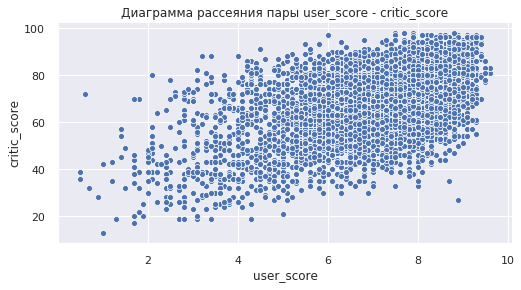

In [88]:
# Диаграмма рассеяния пары user_score - critic_score

d = df_sbs

g = sns.pairplot(data=d,
             x_vars=['user_score'],
             y_vars=['critic_score'])

g.fig.set_size_inches(12,5)
plt.title('Диаграмма рассеяния пары user_score - critic_score')
plt.show()

In [89]:
# Коэффициент корреляции Пирсона для пары user_score - critic_score

df_sbs['user_score'].corr(df_sbs['critic_score'])

0.5808778320767236

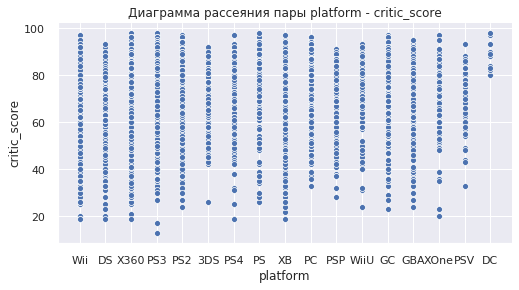

In [90]:
# Диаграмма рассеяния пары platform - critic_score

d = df_sbs

g = sns.pairplot(data=d,
             x_vars=['platform'],
             y_vars=['critic_score'])

g.fig.set_size_inches(12,5)
plt.title('Диаграмма рассеяния пары platform - critic_score')
plt.show()

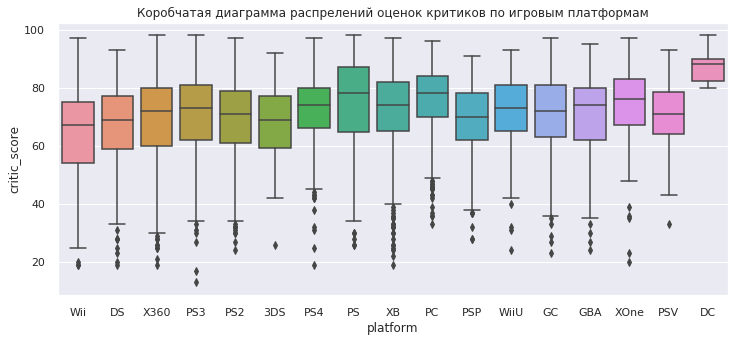

In [91]:
# Коробчатая диаграмма распрелений оценок критиков по игровым платформам

fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(data=d,
             x='platform',
             y='critic_score')

#g.fig.set_size_inches(12,5)
plt.title('Коробчатая диаграмма распрелений оценок критиков по игровым платформам')
plt.show()

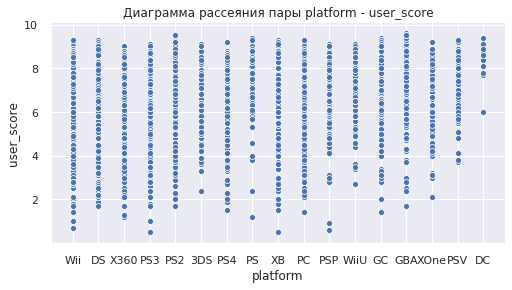

In [92]:
# Диаграмма рассеяния пары platform - user_score

d = df_sbs

g = sns.pairplot(data=d,
             x_vars=['platform'],
             y_vars=['user_score'])

g.fig.set_size_inches(12,5)
plt.title('Диаграмма рассеяния пары platform - user_score')
plt.show()

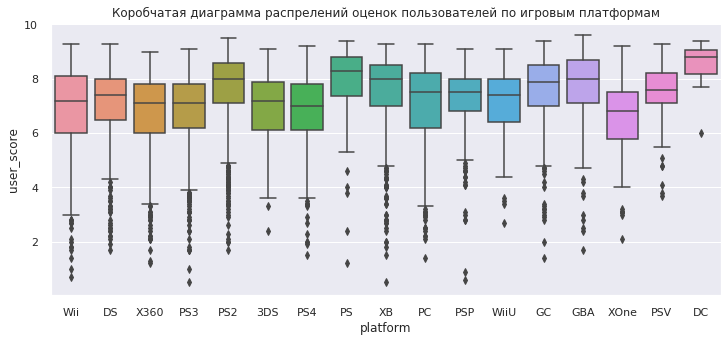

In [93]:
# Коробчатая диаграмма распрелений оценок пользователей по игровым платформам

fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(data=d,
             x='platform',
             y='user_score')

#g.fig.set_size_inches(12,5)
plt.title('Коробчатая диаграмма распрелений оценок пользователей по игровым платформам')
plt.show()

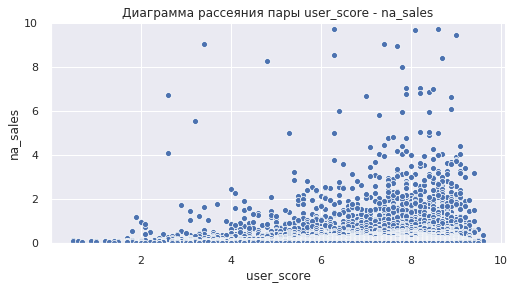

In [94]:
#Диаграмма рассеяния пары user_score - na_sales

df_sbs = df[(df['user_score'].notna()) & 
            (df['critic_score'].notna()) & 
            (~df['user_score'].isin(['tbd']))].copy()

df_sbs.loc[:, 'user_score'] = df_sbs.loc[:, 'user_score'].astype('float64')

d = df_sbs

g = sns.pairplot(data=d,
             x_vars=['user_score'],
             y_vars=['na_sales'])

g.fig.set_size_inches(12,5)
plt.title('Диаграмма рассеяния пары user_score - na_sales')
plt.ylim(0,10)
plt.show()

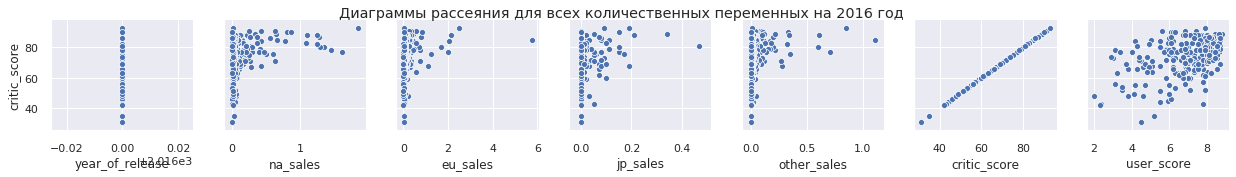

In [95]:
# Диаграммы рассеяния для всех количественных переменных на 2016 год

df_sbs = df[(df['user_score'].notna()) & 
            (df['critic_score'].notna()) & 
            (df['year_of_release'] == 2016) &
            (~df['user_score'].isin(['tbd']))].copy()

df_sbs.loc[:, 'user_score'] = df_sbs.loc[:, 'user_score'].astype('float64')

d = df_sbs.select_dtypes(['int64', 'float64'])

sns.pairplot(data=d,
             x_vars=d.columns,
             y_vars=['critic_score'])
plt.suptitle('Диаграммы рассеяния для всех количественных переменных на 2016 год')
plt.show()

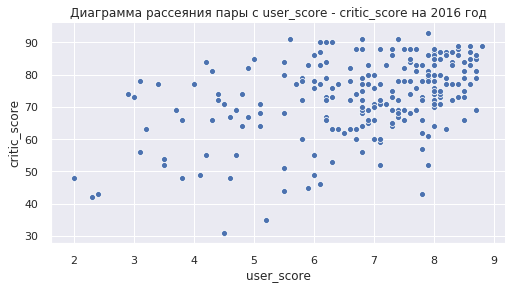

In [96]:
# Диаграмма рассеяния пары c user_score - critic_score на 2016 год 

d = df_sbs

g = sns.pairplot(data=d,
             x_vars=['user_score'],
             y_vars=['critic_score'])

g.fig.set_size_inches(12,5)
plt.title('Диаграмма рассеяния пары c user_score - critic_score на 2016 год')
plt.show()

In [97]:
# Коэффициент корреляции Пирсона для пары user_score - critic_score для данных на 2016 год

df_sbs['user_score'].corr(df_sbs['critic_score'])

0.4399059432584545

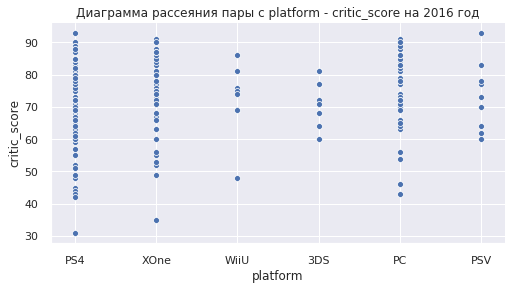

In [98]:
# Диаграмма рассеяния пары c platform - critic_score на 2016 год

d = df_sbs

g = sns.pairplot(data=d,
             x_vars=['platform'],
             y_vars=['critic_score'])

g.fig.set_size_inches(12,5)
plt.title('Диаграмма рассеяния пары c platform - critic_score на 2016 год')
plt.show()

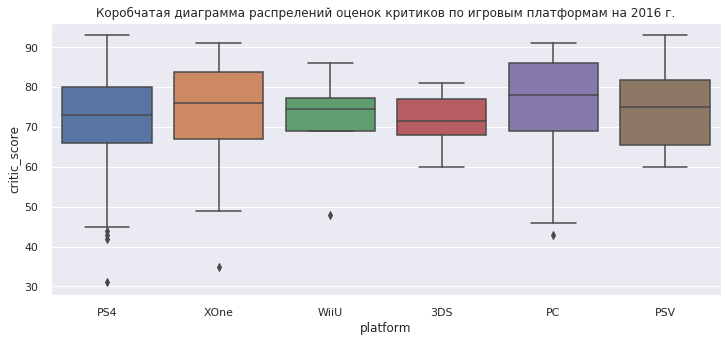

In [99]:
# Коробчатая диаграмма распрелений оценок критиков по игровым платформам на 2016 г.

fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(data=d,
             x='platform',
             y='critic_score')

#g.fig.set_size_inches(12,5)
plt.title('Коробчатая диаграмма распрелений оценок критиков по игровым платформам на 2016 г.')
plt.show()

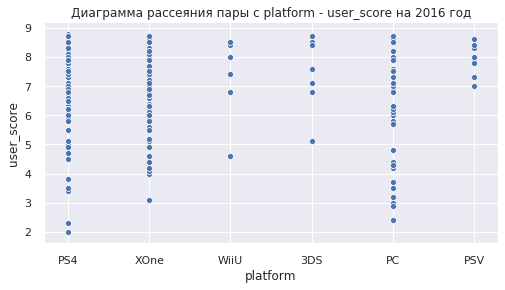

In [100]:
# Диаграмма рассеяния пары c platform - user_score на 2016 год

d = df_sbs

g = sns.pairplot(data=d,
             x_vars=['platform'],
             y_vars=['user_score'])

g.fig.set_size_inches(12,5)
plt.title('Диаграмма рассеяния пары c platform - user_score на 2016 год')
plt.show()

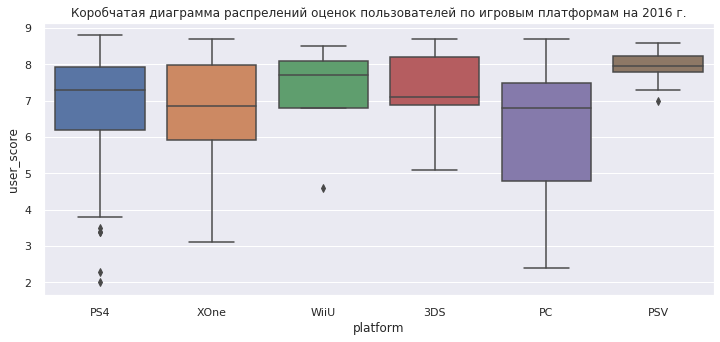

In [101]:
# Коробчатая диаграмма распрелений оценок пользователей по игровым платформам на 2016 г.

fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(data=d,
             x='platform',
             y='user_score')

#g.fig.set_size_inches(12,5)
plt.title('Коробчатая диаграмма распрелений оценок пользователей по игровым платформам на 2016 г.')
plt.show()

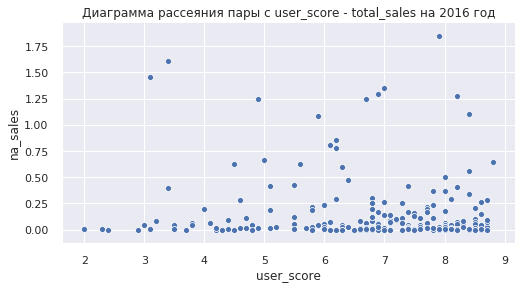

In [102]:
# Диаграмма рассеяния пары c user_score - na_sales на 2016 год

d = df_sbs

g = sns.pairplot(data=d,
             x_vars=['user_score'],
             y_vars=['na_sales'])

g.fig.set_size_inches(12,5)
plt.title('Диаграмма рассеяния пары c user_score - total_sales на 2016 год')
plt.show()

Видим, что оценки критиков и пользователские оценки имееют довольно высокую корреляцию, но ввиду того, что об оценках критиков и пользователей нам известно около половины информации, оставим пропуски без изменений.

In [103]:
# Проверка пропусков

column_info(df_good, 'critic_score')

Количество пропусков: 8461
Доля пропусков: 51%
Тип переменной: float64


In [104]:
column_info(df_good, 'user_score')

Количество пропусков: 8981
Доля пропусков: 55%
Тип переменной: float64


In [105]:
df_good[(df_good['user_score'].isna()) & (~df_good['critic_score'].isna())]['name'].count()

1089

In [106]:
df_good[(~df_good['user_score'].isna()) & (df_good['critic_score'].isna())]['name'].count()

569

In [107]:
# Пересечение пропусков в user_score и user_score

df_good[(df_good['user_score'].isna()) & (df_good['critic_score'].isna())]['name'].count()

7892

Видим взаимосвязь между пропусками в рейтинге и пропусками в пользовательских оценках и оценках критиков.

#### total_sales

Добавим столбец total_sales - общие продажи (миллионы проданных копий) путем сложения продаж по всем регионам

In [108]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df_good['total_sales'] = df_good[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### Выводы

Заменили названия столбцов (привели к нижнему регистру).

Добавили столбец total_sales - общие продажи (миллионы проданных копий) путем сложения продаж по всем регионам.

Был удален один неявный дубликат.

Были найдены и обработаны пропуски в следующих столбцах:

* **name** - 2 (строки с пропусками удалены), 
* **genre** - 2 (строки с пропусками удалены), 
* **year_of_release** - 269 (строки с пропусками удалены, перевели в int вслед. дискретной величины)
* **rating** - 6676 (40%) (RP переведен в Unknown, К-Е переведен в Е как устаревший, пропускам присвоено значение Unknown, чтобы иметь возможность в дальнейшем лучше оперировать такими данными.  
* **critic_score** - 8578 (51%) стало 8461 (пропуски оставили из-за невозможности их адекватного заполнения, тип данных остался прежними из-за оставшихся пропусков)
* **user_score** - 6701 (40%) стало 8981 (tbd' - аббревиатура от 'to be determined' - заменили на NaN вслед. схожести, тип данных изменили на float)

Оставшиеся пропуски в critic_score, user_score и rating практически совпадают (пересечение в 7892 строках, эти данные будем учитывать в вопросах, не связанных с оценками. Пропуски в этих столбцах связаны с отсутствием данных и присущи как ранним выпускам игр из-за сложности составления рейтингов ввиду становления рынка видеоигр, так и более поздним - из-за закрытости информации.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Оценим важность данных за все периоды.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Оценим за какой характерный срок появляются новые и исчезают старые платформы.

Возьмем данные за соответствующий актуальный период. Определим актуальный период в результате исследования предыдущих вопросов. 
Данные за предыдущие годы учитывать не будем.

Оценим какие платформы лидируют по продажам, растут и падают. Выберем несколько потенциально прибыльных платформ.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Соотнесем выводы с продажами игр на других платформах.

Посмотрим на общее распределение игр по жанрам. Выделим жанры с высокими и низкими продажами.

In [109]:
# Выведем таблицу значений взаимных корреляций Пирсона для всех параметров очищенного от пропусков датафрейма

df_good.dropna().corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.020410,0.038077,-0.041684,0.038858,-0.011359,-0.251347,0.002501
na_sales,-0.020410,1.000000,0.841698,0.468371,0.726927,0.232993,0.085767,0.955789
eu_sales,0.038077,0.841698,1.000000,0.519485,0.716489,0.212901,0.055748,0.939252
jp_sales,-0.041684,0.468371,0.519485,1.000000,0.394692,0.147217,0.127895,0.613336
other_sales,0.038858,0.726927,0.716489,0.394692,1.000000,0.191243,0.057136,0.804150
critic_score,-0.011359,0.232993,0.212901,0.147217,0.191243,1.000000,0.579920,0.237156
user_score,-0.251347,0.085767,0.055748,0.127895,0.057136,0.579920,1.000000,0.088359
total_sales,0.002501,0.955789,0.939252,0.613336,0.804150,0.237156,0.088359,1.000000


Посмотрим, сколько игр выпускалось в разные годы.

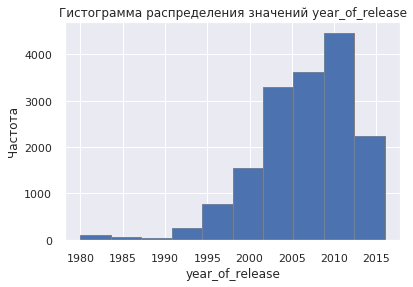

In [110]:
column_hist(df_good['year_of_release'])

In [111]:
df_good['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [112]:
# Пороговые значения в 5% и 95% для нахождения выбросов в переменной

print(np.quantile(df_good[df_good['year_of_release'].notna()]['year_of_release'], 0.05))

print(np.quantile(df_good[df_good['year_of_release'].notna()]['year_of_release'], 0.95))

1996.0
2015.0


Видим, что период с 1980 по 1994 годы можно считать нерелевантным или незначимым для исследования вследствии нелинейности развития игровой индустрии.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [113]:
# Платформы с наибольшими суммарными продажами

df_good = df_good[df_good['year_of_release'] >= 1995].copy()

top_platform = df_good.groupby('platform')['total_sales'].sum().sort_values(ascending=False).to_frame().head(12)

top_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.76
PS,721.55
PS4,314.14
GBA,312.88
PSP,289.53


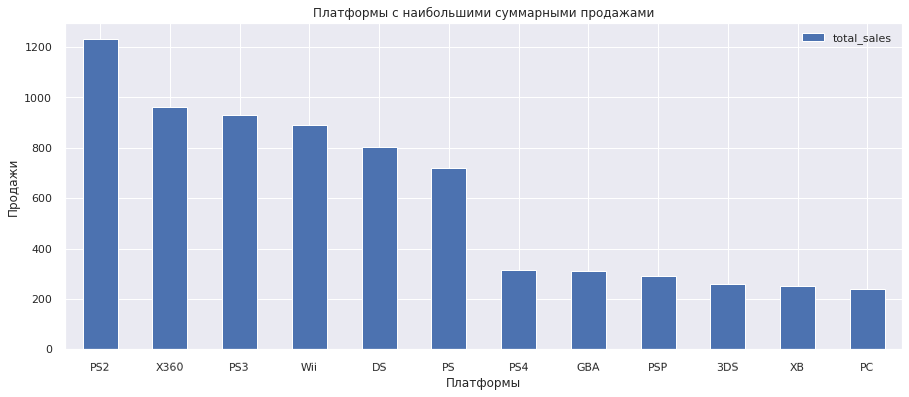

In [114]:
sns.set()
top_platform.plot(kind='bar', rot=1, figsize=(15,6))
plt.title('Платформы с наибольшими суммарными продажами')
plt.legend()
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Видим, что по суммарным продажам выделяются 6 платформ: 

In [115]:
top_platform_list = top_platform[:6].index.tolist()

top_platform_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [116]:
df_top_platform = df_good.query('platform in @top_platform_list')

In [117]:
# Сводная стековая таблица распределения проданных копий по платформам с 1995 по 2016 гг. 

df_top_platform.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

,platform,year_of_release,total_sales
0,DS,2004,17.27
1,DS,2005,130.14
2,DS,2006,119.81
3,DS,2007,146.94
4,DS,2008,145.31
...,...,...,...
60,X360,2012,99.74
61,X360,2013,88.58
62,X360,2014,34.74
63,X360,2015,11.96


In [118]:
# Сводная таблица распределения проданных копий по платформам с 1995 по 2016 гг.

df_top_platform_pivot = df_top_platform.pivot_table(index=['year_of_release'],
                    columns=['platform'],
                    values=['total_sales'],
                    aggfunc=['sum']).fillna(0)

df_top_platform_pivot.columns = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']
df_top_platform_pivot

,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1995,0.00,35.96,0.00,0.00,0.00,0.00
1996,0.00,94.70,0.00,0.00,0.00,0.00
1997,0.00,136.17,0.00,0.00,0.00,0.00
1998,0.00,169.49,0.00,0.00,0.00,0.00
1999,0.00,144.53,0.00,0.00,0.00,0.00
2000,0.00,96.37,39.17,0.00,0.00,0.00
2001,0.00,35.59,166.43,0.00,0.00,0.00
2002,0.00,6.67,205.38,0.00,0.00,0.00
2003,0.00,2.07,184.31,0.00,0.00,0.00


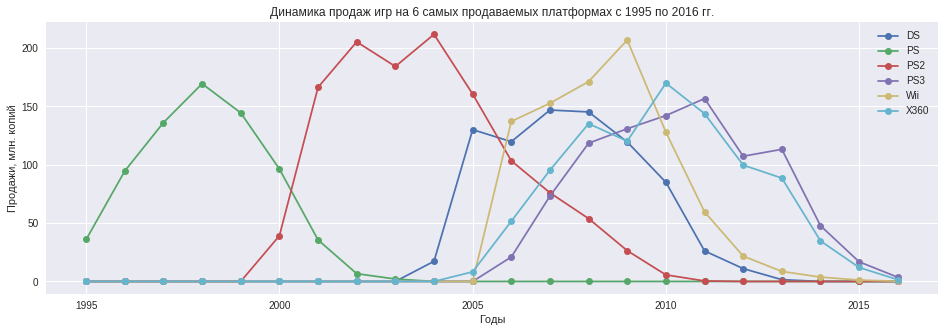

In [119]:
sns.set()
plt.figure(figsize=(16,5))
plt.style.use('seaborn')
plt.plot(df_top_platform_pivot, linestyle='-', marker='o')
plt.title('Динамика продаж игр на 6 самых продаваемых платформах с 1995 по 2016 гг.')
#plt.grid()
plt.legend(['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360'])
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Годы')
plt.show()

Видим, что характерной длительностью жизненного цикла платформы является срок в 10 лет. Исходя из этого, для построения прогноза на 2017 год определим актуальный период как 3-летний, с 2014 по 2016 гг, и данные за предыдущие годы учитывать не будем.

In [120]:
# Топ-лист платформ по продажам с 2014 года

top_platform_from_2014 = df_good.loc[df_good['year_of_release'] >= 2014]\
                        .groupby('platform')['total_sales'].sum().sort_values(ascending=False).to_frame().head(12)

top_platform_from_2014

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


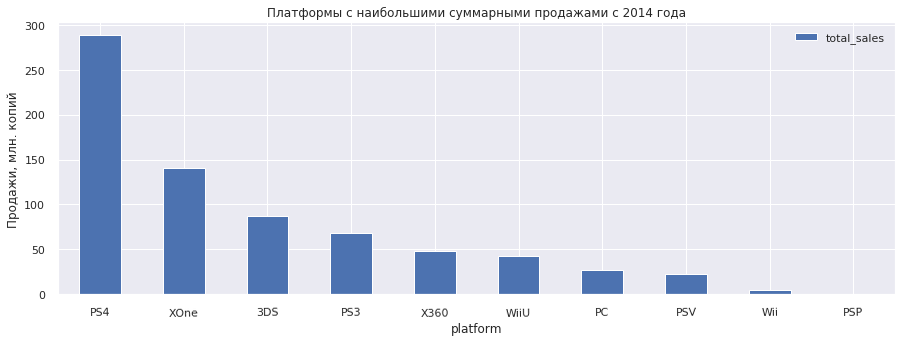

In [121]:
sns.set()
top_platform_from_2014.plot(kind='bar', rot=1, figsize=(15,5))
plt.title('Платформы с наибольшими суммарными продажами c 2014 года')
plt.legend()
#plt.xlabel('Платформы')
plt.ylabel('Продажи, млн. копий')
plt.show()

In [122]:
top_platform__from_2014_list = top_platform_from_2014.index.tolist()

top_platform__from_2014_list

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

In [123]:
# Срез данных топовых по продажам платформ с 2014 г.

df_top_platform_from_2014 = df_good.query('platform in @top_platform__from_2014_list')

In [124]:
# Сводная таблица распределения проданных копий по платформам с 2014 г.

df_top_platform_from_2014_pivot = df_top_platform_from_2014.pivot_table(
                    index=['year_of_release'],
                    columns=['platform'],
                    values=['total_sales'],
                    aggfunc=['sum']).fillna(0)

df_top_platform_from_2014_pivot.columns = ['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
df_top_platform_from_2014_pivot = df_top_platform_from_2014_pivot.loc[2014:]
df_top_platform_from_2014_pivot

,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


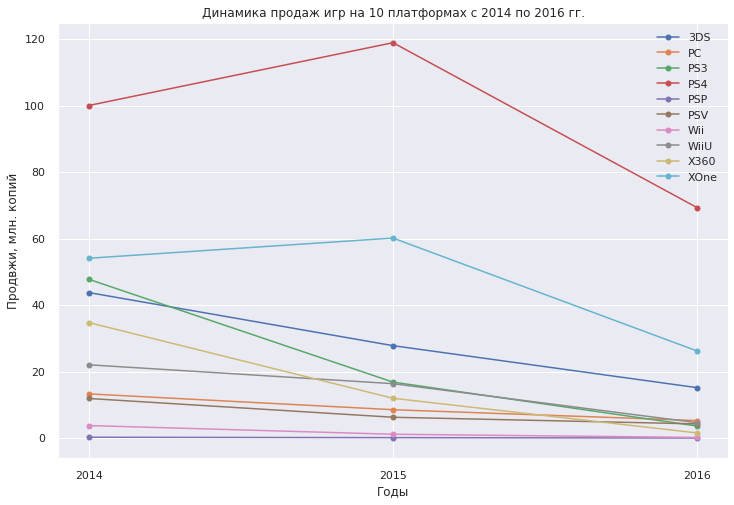

In [125]:
sns.set()
plt.figure(figsize=(12,8))
plt.plot(df_top_platform_from_2014_pivot, linestyle='solid', marker='o')
plt.title('Динамика продаж игр на 10 платформах с 2014 по 2016 гг.')
plt.legend(['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'])
plt.xticks(range(2014, 2017, 1))
plt.xlabel('Годы')
plt.ylabel('Продажи, млн. копий')
plt.show()

Видим, что за последние 10 лет по продажам лидируют PS3 (Sony PlayStation 3), X360 (Microsoft) и Wii (Nintendo), но они продолжают стремительное падение. На 2016 год лидерами продаж стали PS4, XOne и 3DS (компании те же), но и они падают - по отношению к 2015 - почти в 2 раза.

Выберем несколько потенциально прибыльных платформ: PS4, XOne, 3DS, PC, PS3, PSV, WiiU, X360.

<div class="alert alert-success">
<font color='blue'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА ✔️</u>
</font>
    <br />
Отличный выбор! Похоже, что эти платформы либо "всё еще живы", либо "далеки от вымирания"

Построим коробчатую диаграмму по глобальным продажам игр в разбивке по платформам.

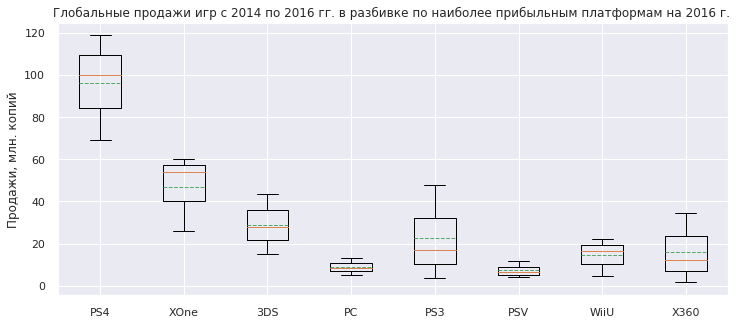

In [136]:
sns.set()
top_profit_platform_list = ['PS4', 'XOne', '3DS', 'PC', 'PS3', 'PSV', 'WiiU', 'X360']
top_profit_platform_boxplot = []

for platform in top_profit_platform_list:
    top_profit_platform_boxplot.append(df_top_platform_from_2014_pivot[platform])
    
plt.figure(figsize=(12,5))
plt.boxplot(top_profit_platform_boxplot, 
            labels=(top_profit_platform_list), 
            meanline=True, 
            showmeans=True, 
            showcaps=True, 
            showbox=True, 
            showfliers=True)
plt.title('Глобальные продажи игр с 2014 по 2016 гг. в разбивке по наиболее прибыльным платформам на 2016 г. ')
plt.ylabel('Продажи, млн. копий')
#plt.ylim(0, 40)
plt.show()

Составим срез по этим платформам в основном датасете df_good, возьмем каждую игру с её продажами и построим boxplot по каждой игре

In [127]:
df_sbs = df_good.loc[(df_good['year_of_release'] >= 2014) & (df_good['platform'].isin(top_profit_platform_list))].copy()

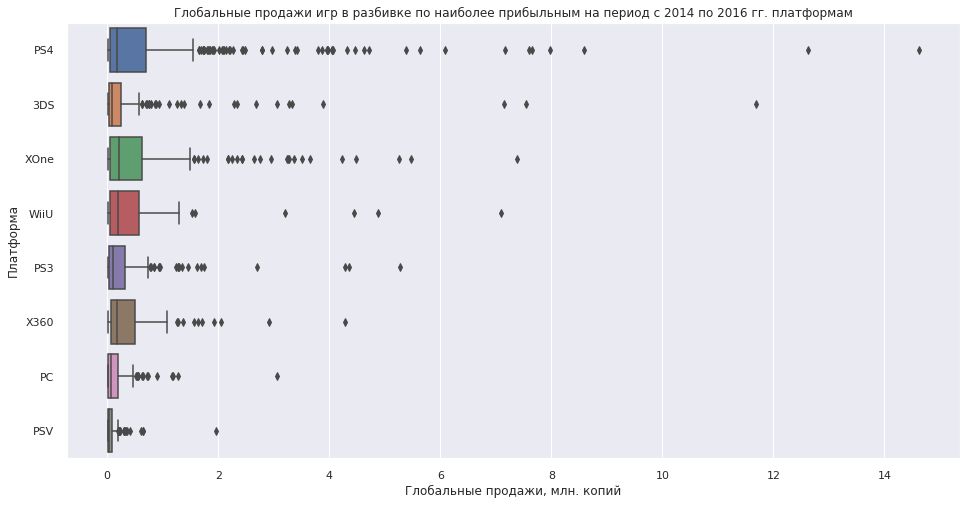

In [132]:
sns.set()
plt.figure(figsize=(16,8))
ax = sns.boxplot(y='platform', 
            x='total_sales',
            #hue= ,
            orient='h',
            data=df_sbs)
plt.title('Глобальные продажи игр в разбивке по наиболее прибыльным на период с 2014 по 2016 гг. платформам')
ax.set_ylabel('Платформа')
ax.set_xlabel('Продажи, млн. копий')
plt.show()

В результате видим сильный разброс продаж и высокий показатель медианы у PS3 и X360, что говорит об относительной популярности, средний у PS4, XOne и WiiU, и очень незначительный у PSV, 3DS и PC. Показатели платфоры PC и PSV говорят об их стабильности. PS4 (самая молодая платформа) и X360 набирают популярность (за 2016 год статистика неполная).

Посмотрим, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

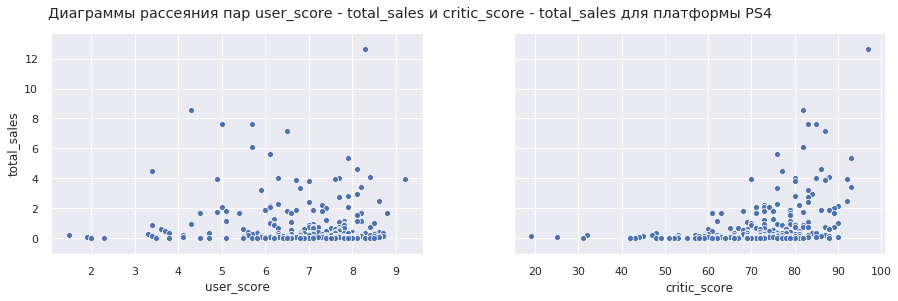

In [126]:
# Диаграммы рассеяния пар user_score - total_sales и critic_score - total_sales для платформы PS4
sns.set()
df_good_from_2014_ps4 = df_good[(df_good['user_score'].notna()) & 
                 (df_good['critic_score'].notna()) & 
                 (df_good['platform'].isin(['PS4'])) &
                 (df_good['year_of_release'] >= 2014)].copy()

g = sns.pairplot(data=df_good_from_2014_ps4,
             x_vars=['user_score', 'critic_score'],
             y_vars=['total_sales'])
g.fig.set_size_inches(15,5)
#plt.ylim(0, 4)
plt.suptitle('Диаграммы рассеяния пар user_score - total_sales и critic_score - total_sales для платформы PS4')
plt.show()

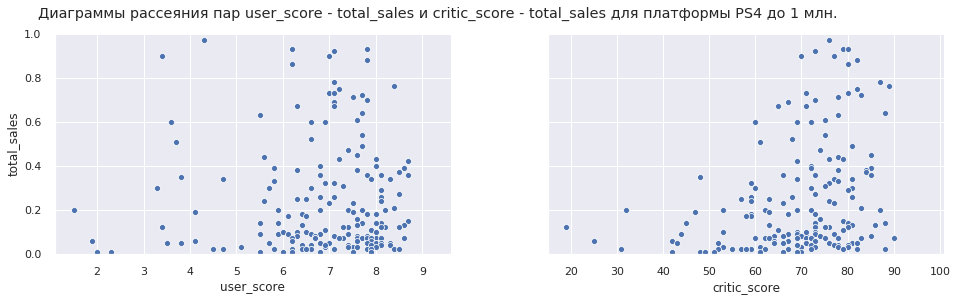

In [127]:
# Диаграммы рассеяния пар user_score - total_sales и critic_score - total_sales для платформы PS4 до 1 млн. проданных копий 
sns.set()
df_good_from_2014_ps4 = df_good[(df_good['user_score'].notna()) & 
                 (df_good['critic_score'].notna()) & 
                 (df_good['platform'].isin(['PS4'])) &
                 (df_good['year_of_release'] >= 2014)].copy()

g = sns.pairplot(data=df_good_from_2014_ps4,
             x_vars=['user_score', 'critic_score'],
             y_vars=['total_sales'])
g.fig.set_size_inches(16,5)
plt.ylim(0, 1)
plt.suptitle('Диаграммы рассеяния пар user_score - total_sales и critic_score - total_sales для платформы PS4 до 1 млн.')
plt.show()

In [128]:
# Корреляция между total_sales и critic_score для платформы PS4

df_good_from_2014_ps4['total_sales'].corr(df_good_from_2014_ps4['critic_score'])

0.40190287811475334

In [129]:
# Корреляция между total_sales и user_score для платформы PS4

df_good_from_2014_ps4['total_sales'].corr(df_good_from_2014_ps4['user_score'])

-0.04318585997193634

Вывод можно сделать следующий: с увеличением оценки продажи растут, но не столь значительно, причем в большей мере зависимость прослеживается от оценки критиков: где есть высокая оценка могут быть и низкие продажи, но там где оценка низкая - высоких продаж не наблюдаем. 

В общем оценка критиков слабо влияет на продажи, а пользователей - совсем не влияет. 

Соотнесем выводы с продажами игр на других платформах. 

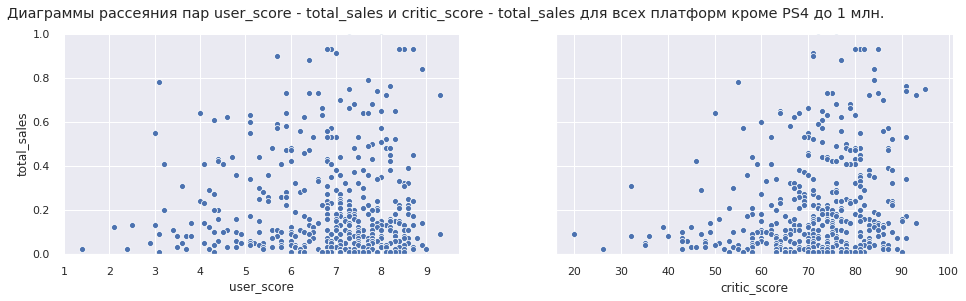

In [130]:
# Диаграммы рассеяния пар user_score - total_sales и critic_score - total_sales 
# для всех платформ кроме PS4 до 1 млн. проданных копий 
sns.set()
df_good_from_2014_other = df_good[(df_good['user_score'].notna()) & 
                 (df_good['critic_score'].notna()) & 
                 (~df_good['platform'].isin(['PS4'])) &
                 (df_good['year_of_release'] >= 2014)].copy()

g = sns.pairplot(data=df_good_from_2014_other,
             x_vars=['user_score', 'critic_score'],
             y_vars=['total_sales'])
g.fig.set_size_inches(16,5)
plt.ylim(0, 1)
plt.suptitle(
    'Диаграммы рассеяния пар user_score - total_sales и critic_score - total_sales для всех платформ кроме PS4 до 1 млн.')
plt.show()

In [131]:
# Корреляция между total_sales и critic_score для всех платформ кроме PS4

df_good_from_2014_other['total_sales'].corr(df_good_from_2014_other['critic_score'])

0.3047894679009596

In [132]:
# Корреляция между total_sales и user_score для всех платформ кроме PS4

df_good_from_2014_other['total_sales'].corr(df_good_from_2014_other['user_score'])

0.04349004366944432

In [133]:
# Для верности сделаем сравнение с платформой X360

df_good_from_2014_x360 = df_good[(df_good['user_score'].notna()) & 
                 (df_good['critic_score'].notna()) & 
                 (~df_good['platform'].isin(['X360'])) &
                 (df_good['year_of_release'] >= 2014)].copy()

In [134]:
# Корреляция между total_sales и critic_score для платформы X360

df_good_from_2014_x360['total_sales'].corr(df_good_from_2014_x360['critic_score'])

0.3245728838899569

In [135]:
# Корреляция между total_sales и user_score для платформы X360

df_good_from_2014_x360['total_sales'].corr(df_good_from_2014_x360['user_score'])

-0.002895113063096141

In [136]:
# Сделаем сравнение с платформой PS3

df_good_from_2014_ps3 = df_good[(df_good['user_score'].notna()) & 
                 (df_good['critic_score'].notna()) & 
                 (~df_good['platform'].isin(['PS3'])) &
                 (df_good['year_of_release'] >= 2014)].copy()

In [137]:
# Корреляция между total_sales и critic_score для платформы PS3

df_good_from_2014_ps3['total_sales'].corr(df_good_from_2014_ps3['critic_score'])

0.3247297457244377

In [138]:
# Корреляция между total_sales и user_score для платформы PS3

df_good_from_2014_ps3['total_sales'].corr(df_good_from_2014_ps3['user_score'])

-0.0020425982136849027

Видим, что и в целом картина примерно та же. 

Посмотрим на общее распределение игр по жанрам. 

In [139]:
# Срез df_good с 2014 г.

df_good_from_2014 = df_good[df_good['year_of_release'] >= 2014].copy()

In [140]:
genres = df_good_from_2014.groupby('genre')['total_sales'].agg(['count', 'sum', 'median', 'mean'])\
                                                                    .sort_values(by='median', ascending=False)
genres

,count,sum,median,mean
genre,,,,
Shooter,128,170.94,0.515,1.335469
Sports,161,109.48,0.180,0.680000
Platform,38,18.09,0.140,0.476053
Fighting,60,28.22,0.125,0.470333
Role-Playing,221,101.44,0.110,0.459005
Simulation,44,13.13,0.100,0.298409
Action,619,199.36,0.090,0.322068
Misc,113,37.55,0.090,0.332301
Racing,69,27.52,0.090,0.398841


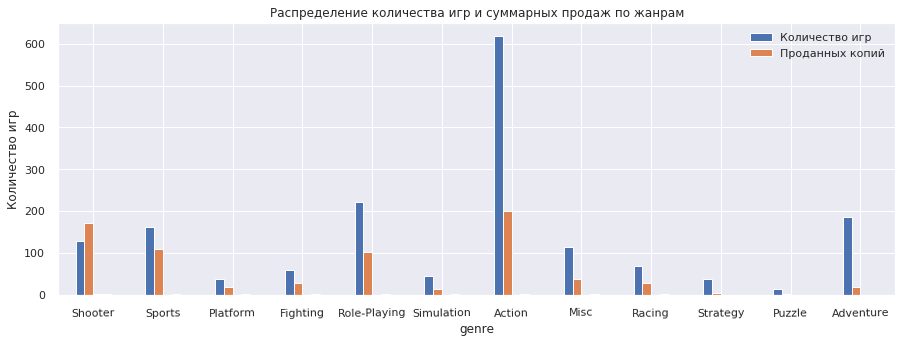

In [141]:
sns.set()
genres.plot(kind='bar', rot=1, figsize=(15,5))
plt.title('Распределение количества игр и суммарных продаж по жанрам')
plt.legend(['Количество игр', 'Проданных копий'])
plt.ylabel('Количество игр')
plt.show()

Топ-5 жанров, где игры стабильно пользуются спросом: Shooter, Sports, Platform, Fighting и Role-Playing. Самые плохие продажи в Puzzle, Strategy и Adventure. Жанры с высокими и низкими продажами явно выделяются.

### Выводы

По гистограмме распределения числа игр за разные годы, делаем вывод, что период с 1980 по 1995 годы можно считать статистически незначительным.

На основании диаграммы динамики продаж игр на 12 самых продаваемых платформах с 1985 по 2016 гг. оценили характерную длительность жизненного цикла платформы. Он составил примерно 10 лет. А характерный срок появления новых и исчезновения старых платфор составил примерно 3 года. Исходя из этого, для построения прогноза на 2017 год определим актуальный период как 3-летний, с 2014 по 2016 гг., и данные за предыдущие годы учитывать не будем.

Оценили какие платформы лидируют по продажам, растут и падают. Выбрали несколько потенциально прибыльных платформ.
Видим, что за последние 10 лет по продажам лидируют PS3 (Sony PlayStation 3), X360 (Microsoft) и Wii (Nintendo), но они продолжают стремительное падение. За актуальный период лидерами продаж стали PS4, XOne и 3DS.

Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. В результате видим сильный разброс продаж и высокий показатель медианы у PS3 и X360, что говорит об относительной популярности, средний у PS4, XOne и WiiU, и очень незначительный у PSV, 3DS и PC. Показатели платфоры PC и PSV говорят об их стабильности. PS4 (самая молодая платформа) и X360 набирают популярность (за 2016 год статистика неполная).

Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. Вывод следующий: с увеличением оценки продажи растут, но не столь значительно, причем в большей мере зависимость прослеживается от оценки критиков: где есть высокая оценка могут быть и низкие продажи, но там где оценка низкая - высоких продаж не наблюдаем. В общем можно сказать, что оценка критиков слабо влияет на продажи, а оценка пользователей совсем не влияет.  

Построили распределение количества игр и продаж по жанрам. Выделили жанры с высокими и низкими продажами. В топ-5 жанров, где игры стабильно пользуются спросом: Shooter, Sports, Platform, Fighting и Role-Playing. Самые плохие продажи в Puzzle, Strategy и Adventure. Жанры с высокими и низкими продажами явно выделяются.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишем различия в долях продаж.
* Самые популярные жанры (топ-5). Поясним разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе

### Самые популярные платформы (топ-5)

In [142]:
# Топ-5 платформ по популярности в мире

top_platform = df_good_from_2014.groupby('platform')['total_sales'].agg(['count', 'sum', 'median', 'mean'])\
                                    .sort_values(by='sum', ascending=False).head()

top_platform['sum_ratio'] = top_platform['sum'] / top_platform['sum'].sum()

top_platform

,count,sum,median,mean,sum_ratio
platform,,,,,
PS4,376,288.15,0.185,0.766356,0.456230
XOne,228,140.36,0.205,0.615614,0.222233
3DS,212,86.68,0.090,0.408868,0.137241
PS3,219,68.18,0.110,0.311324,0.107950
X360,111,48.22,0.180,0.434414,0.076347


In [143]:
# Популярность платформ в Сев. Америке

top_platform_na = df_good_from_2014.groupby('platform')['na_sales'].agg(['sum', 'median', 'mean'])\
                                    .sort_values(by='median', ascending=False)

top_platform_na['sum_ratio'] = top_platform_na['sum'] / top_platform_na['sum'].sum()

top_platform_na

,sum,median,mean,sum_ratio
platform,,,,
X360,28.30,0.10,0.254955,0.099627
XOne,81.27,0.10,0.356447,0.286102
WiiU,19.36,0.09,0.265205,0.068155
PS4,98.61,0.05,0.262261,0.347145
Wii,2.08,0.04,0.189091,0.007322
PS3,22.05,0.02,0.100685,0.077624
3DS,22.64,0.00,0.106792,0.079701
PC,7.23,0.00,0.047881,0.025452
PSP,0.00,0.00,0.000000,0.000000


In [144]:
# Популярность платформ в в Европе

top_platform_eu = df_good_from_2014.groupby('platform')['eu_sales'].agg(['sum', 'median', 'mean'])\
                                    .sort_values(by='median', ascending=False)

top_platform_eu['sum_ratio'] = top_platform_eu['sum'] / top_platform_eu['sum'].sum()

top_platform_eu

,sum,median,mean,sum_ratio
platform,,,,
Wii,2.59,0.12,0.235455,0.009568
PS4,130.04,0.07,0.345851,0.480420
XOne,46.25,0.07,0.202851,0.170866
WiiU,13.15,0.06,0.180137,0.048581
PC,17.97,0.05,0.119007,0.066388
X360,15.49,0.05,0.139550,0.057226
PS3,25.54,0.01,0.116621,0.094355
3DS,16.12,0.00,0.076038,0.059554
PSP,0.00,0.00,0.000000,0.000000


In [145]:
# Популярность платформ в Японии

top_platform_jp = df_good_from_2014.groupby('platform')['jp_sales'].agg(['sum', 'median', 'mean'])\
                                    .sort_values(by='median', ascending=False)

top_platform_jp['sum_ratio'] = top_platform_jp['sum'] / top_platform_jp['sum'].sum()

top_platform_jp

,sum,median,mean,sum_ratio
platform,,,,
3DS,44.24,0.055,0.208679,0.475239
PSV,14.54,0.030,0.049288,0.156193
PS3,11.22,0.020,0.051233,0.120529
PSP,0.36,0.020,0.027692,0.003867
PS4,15.02,0.015,0.039947,0.161349
WiiU,7.31,0.010,0.100137,0.078526
PC,0.00,0.000,0.000000,0.000000
Wii,0.00,0.000,0.000000,0.000000
X360,0.08,0.000,0.000721,0.000859


In [146]:
# Сведем данные по продажам в регионах в одну таблицу согласно мировому топ-5 платформ по популярности

top_platform_sales = top_platform[['sum']].merge(
    top_platform_na[['sum']], 
    left_index=True, 
    right_index=True, 
    sort=False, 
    suffixes=('_gl', '_na'), 
    copy=True, 
    indicator=False, 
    validate=None
) 
top_platform_sales = top_platform_sales.merge(
    top_platform_eu[['sum']], 
    left_index=True, 
    right_index=True, 
    sort=False, 
    copy=True, 
    indicator=False, 
    validate=None
) 
top_platform_sales = top_platform_sales.merge(
    top_platform_jp[['sum']], 
    left_index=True, 
    right_index=True, 
    sort=False, 
    suffixes=('_eu', '_jp'), 
    copy=True, 
    indicator=False, 
    validate=None
)
top_platform_sales

,sum_gl,sum_na,sum_eu,sum_jp
platform,,,,
PS4,288.15,98.61,130.04,15.02
XOne,140.36,81.27,46.25,0.32
3DS,86.68,22.64,16.12,44.24
PS3,68.18,22.05,25.54,11.22
X360,48.22,28.30,15.49,0.08


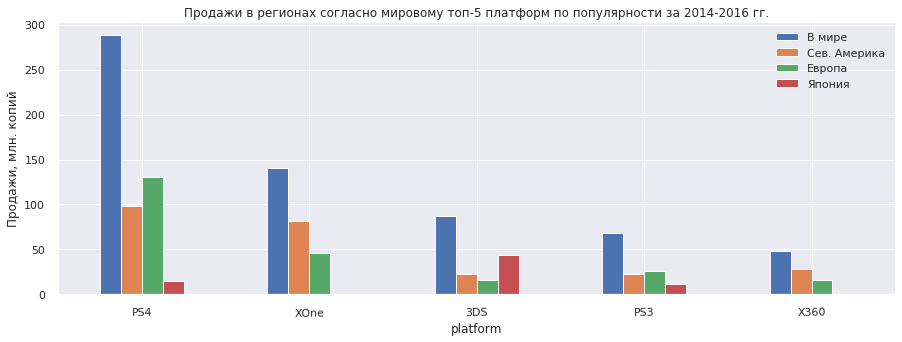

In [147]:
sns.set()
top_platform_sales.plot(kind='bar', rot=1, figsize=(15,5))
plt.title('Продажи в регионах согласно мировому топ-5 платформ по популярности за 2014-2016 гг.')
plt.legend(['В мире', 'Сев. Америка', 'Европа', 'Япония'])
plt.ylabel('Продажи, млн. копий')
plt.show()

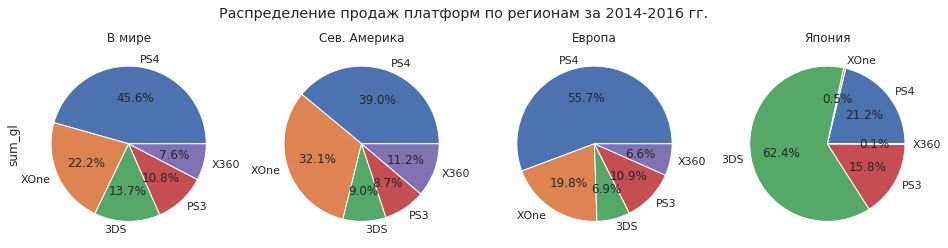

In [212]:
sns.set()
top_platform_sales.plot(
    kind='pie', 
    subplots=True,
    sharey=True,
    figsize=(16,4),
    layout=(1,4),
    legend=False,
    autopct='%1.1f%%', 
    title = ['В мире', 'Сев. Америка', 'Европа', 'Япония'],
)
plt.suptitle('Распределение продаж платформ по регионам за 2014-2016 гг.')
plt.ylabel('')
plt.show()

Видим, что в Европе превалируют PS4 (наибольшая глобальная популярность) и XOne, в Сев. Америке - PS4, XOne и X360,  а в Японии - 3DS, PS4 и PSV. Причем PS4 в Европе обгоняет Сев.Америку, а XOne и X360 - наоборот. 3DS - абсолютный лидер в Японии. В целом платформы Sony выигрывают по популярности у Microsoft. Рынок видеоигр Сев. Америки примерно равен европейскому. 

### Самые популярные жанры (топ-5)

In [149]:
# Топ-жанров по популярности в мире

top_genre = df_good_from_2014.groupby('genre')['total_sales'].agg(['count', 'sum', 'mean', 'median'])\
                                    .sort_values(by='sum', ascending=False).head()

top_genre['sum_ratio'] = top_genre['sum'] / top_genre['sum'].sum()

top_genre

,count,sum,mean,median,sum_ratio
genre,,,,,
Action,619,199.36,0.322068,0.090,0.322188
Shooter,128,170.94,1.335469,0.515,0.276258
Sports,161,109.48,0.680000,0.180,0.176932
Role-Playing,221,101.44,0.459005,0.110,0.163938
Misc,113,37.55,0.332301,0.090,0.060685


In [150]:
# Популярность жанров в Сев. Америке

top_genre_na = df_good_from_2014.groupby('genre')['na_sales'].agg(['sum', 'mean', 'median'])\
                                    .sort_values(by='median', ascending=False)

top_genre_na['sum_ratio'] = top_genre_na['sum'] / top_genre_na['sum'].sum()

top_genre_na

,sum,mean,median,sum_ratio
genre,,,,
Shooter,79.02,0.617344,0.220,0.278181
Platform,6.79,0.178684,0.075,0.023903
Sports,46.13,0.286522,0.070,0.162395
Fighting,12.43,0.207167,0.040,0.043758
Racing,8.74,0.126667,0.030,0.030768
Role-Playing,33.47,0.151448,0.020,0.117827
Action,72.53,0.117173,0.010,0.255333
Misc,15.05,0.133186,0.010,0.052982
Adventure,5.64,0.030486,0.000,0.019855


In [151]:
# Популярность жанров в Европе

top_genre_eu = df_good_from_2014.groupby('genre')['eu_sales'].agg(['sum', 'mean', 'median'])\
                                    .sort_values(by='median', ascending=False)

top_genre_eu['sum_ratio'] = top_genre_eu['sum'] / top_genre_eu['sum'].sum()

top_genre_eu

,sum,mean,median,sum_ratio
genre,,,,
Shooter,65.52,0.511875,0.220,0.242057
Platform,6.80,0.178947,0.055,0.025122
Racing,14.13,0.204783,0.050,0.052202
Sports,45.73,0.284037,0.050,0.168945
Simulation,7.30,0.165909,0.030,0.026969
Action,74.68,0.120646,0.020,0.275898
Fighting,6.69,0.111500,0.020,0.024716
Misc,12.86,0.113805,0.010,0.047510
Role-Playing,28.17,0.127466,0.010,0.104071


In [152]:
# Популярность жанров в Японии

top_genre_jp = df_good_from_2014.groupby('genre')['jp_sales'].agg(['sum', 'mean', 'median'])\
                                    .sort_values(by='median', ascending=False)

top_genre_jp['sum_ratio'] = top_genre_jp['sum'] / top_genre_jp['sum'].sum()

top_genre_jp

,sum,mean,median,sum_ratio
genre,,,,
Role-Playing,31.16,0.140995,0.05,0.334730
Fighting,6.37,0.106167,0.03,0.068428
Puzzle,0.93,0.066429,0.03,0.009990
Action,29.58,0.047787,0.01,0.317757
Adventure,3.60,0.019459,0.01,0.038672
Misc,5.61,0.049646,0.01,0.060264
Platform,2.69,0.070789,0.00,0.028897
Racing,1.76,0.025507,0.00,0.018906
Shooter,4.87,0.038047,0.00,0.052315


In [153]:
# Сведем данные по продажам в регионах в одну таблицу согласно мировому топ-5 жанров по популярности

top_genre_sales = top_genre[['sum']].merge(
    top_genre_na[['sum']], 
    left_index=True, 
    right_index=True, 
    sort=False, 
    suffixes=('_gl', '_na'), 
    copy=True, 
    indicator=False, 
    validate=None
) 
top_genre_sales = top_genre_sales.merge(
    top_genre_eu[['sum']], 
    left_index=True, 
    right_index=True, 
    sort=False, 
    copy=True, 
    indicator=False, 
    validate=None
) 
top_genre_sales = top_genre_sales.merge(
    top_genre_jp[['sum']], 
    left_index=True, 
    right_index=True, 
    sort=False, 
    suffixes=('_eu', '_jp'), 
    copy=True, 
    indicator=False, 
    validate=None
)
top_genre_sales

,sum_gl,sum_na,sum_eu,sum_jp
genre,,,,
Action,199.36,72.53,74.68,29.58
Shooter,170.94,79.02,65.52,4.87
Sports,109.48,46.13,45.73,3.26
Role-Playing,101.44,33.47,28.17,31.16
Misc,37.55,15.05,12.86,5.61


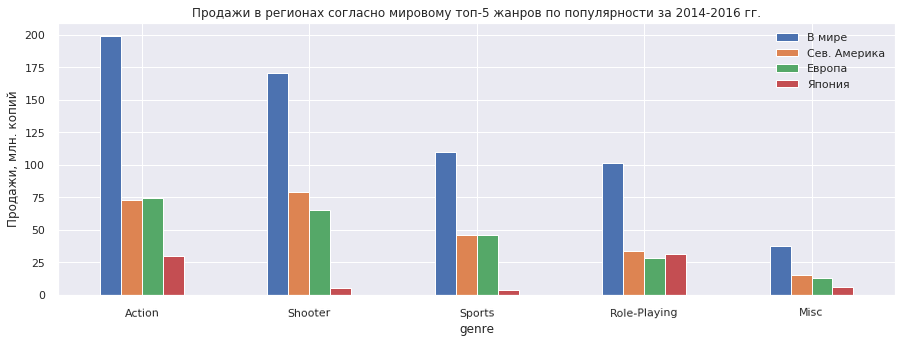

In [154]:
sns.set()
top_genre_sales.plot(kind='bar', rot=1, figsize=(15,5))
plt.title('Продажи в регионах согласно мировому топ-5 жанров по популярности за 2014-2016 гг.')
plt.legend(['В мире', 'Сев. Америка', 'Европа', 'Япония'])
plt.ylabel('Продажи, млн. копий')
plt.show()

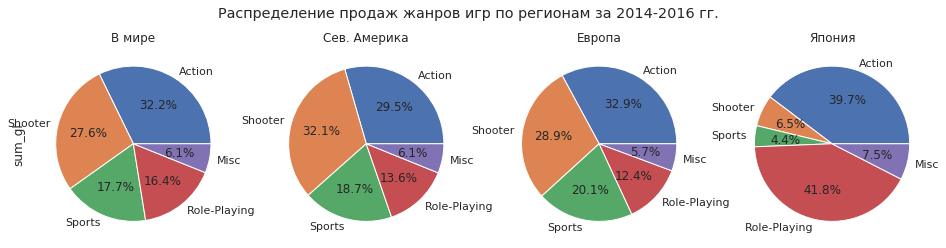

In [227]:
sns.set()
top_genre_sales.plot(
    kind='pie', 
    subplots=True,
    sharey=True,
    sharex=True,
    figsize=(16,4),
    layout=(1,4),
    legend=False,
    autopct='%1.1f%%', 
    title = ['В мире', 'Сев. Америка', 'Европа', 'Япония'],
)
plt.suptitle('Распределение продаж жанров игр по регионам за 2014-2016 гг.')
plt.ylabel('')
#plt.legend(loc='upper left')
plt.show()

Видим, что Action и Shooter - самые популярные жанры в Европе, Сев. Америке и в мире вцелом, жанры Sports и Role-Playing значительно уступают. В Японии картина несколько иная - здесь превалирует жанр Role-Playing, а Action лишь на 2-м месте по популярности, все остальные значительно уступают.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [156]:
# Зависимость продаж от рейтинга ESRB 

top_rating = df_good_from_2014.groupby('rating')['total_sales'].agg(['count', 'sum', 'mean', 'median'])\
                                    .sort_values(by='sum', ascending=False).head()

top_rating['sum_ratio'] = top_rating['sum'] / top_rating['sum'].sum()

top_rating

,count,sum,mean,median,sum_ratio
rating,,,,,
M,265,226.54,0.854868,0.28,0.310563
Unknown,749,198.97,0.265648,0.05,0.272767
E,219,133.13,0.607900,0.12,0.182507
T,271,99.13,0.365793,0.13,0.135897
E10+,185,71.68,0.387459,0.24,0.098266


In [157]:
# Зависимость продаж от рейтинга ESRB в Сев. Америке

top_rating_na = df_good_from_2014.groupby('rating')['na_sales'].agg(['sum', 'mean', 'median'])\
                                    .sort_values(by='median', ascending=False)

top_rating_na['sum_ratio'] = top_rating_na['sum'] / top_rating_na['sum'].sum()

top_rating_na

,sum,mean,median,sum_ratio
rating,,,,
M,96.42,0.363849,0.12,0.339435
E10+,33.23,0.179622,0.10,0.116982
E,50.74,0.231689,0.05,0.178624
T,38.95,0.143727,0.03,0.137119
Unknown,64.72,0.086409,0.00,0.227839


In [158]:
# Зависимость продаж от рейтинга ESRB в Европе

top_rating_eu = df_good_from_2014.groupby('rating')['eu_sales'].agg(['sum', 'mean', 'median'])\
                                    .sort_values(by='median', ascending=False)

top_rating_eu['sum_ratio'] = top_rating_eu['sum'] / top_rating_eu['sum'].sum()

top_rating_eu

,sum,mean,median,sum_ratio
rating,,,,
M,93.44,0.352604,0.12,0.345205
E10+,26.16,0.141405,0.09,0.096645
E,58.06,0.265114,0.05,0.214497
T,34.07,0.125720,0.04,0.125868
Unknown,58.95,0.078705,0.00,0.217785


In [159]:
# Зависимость продаж от рейтинга ESRB в Японии

top_rating_jp = df_good_from_2014.groupby('rating')['jp_sales'].agg(['sum', 'mean', 'median'])\
                                    .sort_values(by='median', ascending=False)

top_rating_jp['sum_ratio'] = top_rating_jp['sum'] / top_rating_jp['sum'].sum()

top_rating_jp

,sum,mean,median,sum_ratio
rating,,,,
Unknown,56.90,0.075968,0.02,0.611236
T,14.78,0.054539,0.01,0.158771
E,8.94,0.040822,0.00,0.096036
E10+,4.46,0.024108,0.00,0.047911
M,8.01,0.030226,0.00,0.086046


In [160]:
# Сведем данные по продажам в регионах в одну таблицу согласно рейтингу ESRB 

top_rating_sales = top_rating[['sum']].merge(
    top_rating_na[['sum']], 
    left_index=True, 
    right_index=True, 
    sort=False, 
    suffixes=('_gl', '_na'), 
    copy=True, 
    indicator=False, 
    validate=None
) 
top_rating_sales = top_rating_sales.merge(
    top_rating_eu[['sum']], 
    left_index=True, 
    right_index=True, 
    sort=False, 
    copy=True, 
    indicator=False, 
    validate=None
) 
top_rating_sales = top_rating_sales.merge(
    top_rating_jp[['sum']], 
    left_index=True, 
    right_index=True, 
    sort=False, 
    suffixes=('_eu', '_jp'), 
    copy=True, 
    indicator=False, 
    validate=None
)
top_rating_sales

,sum_gl,sum_na,sum_eu,sum_jp
rating,,,,
M,226.54,96.42,93.44,8.01
Unknown,198.97,64.72,58.95,56.90
E,133.13,50.74,58.06,8.94
T,99.13,38.95,34.07,14.78
E10+,71.68,33.23,26.16,4.46


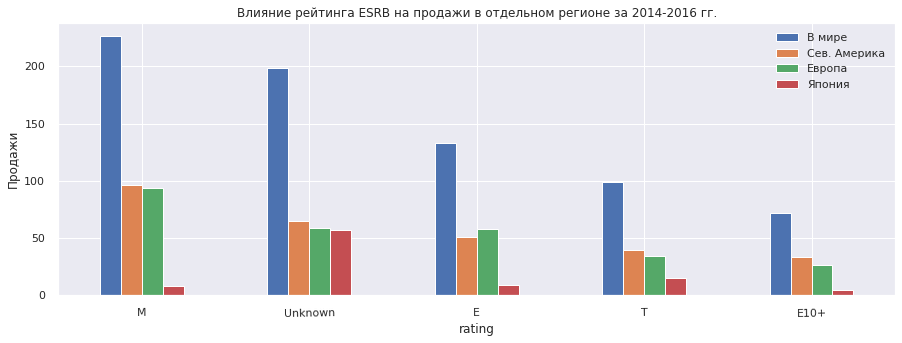

In [161]:
sns.set()
top_rating_sales.plot(kind='bar', rot=1, figsize=(15,5))
plt.title('Влияние рейтинга ESRB на продажи в отдельном регионе за 2014-2016 гг.')
plt.legend(['В мире', 'Сев. Америка', 'Европа', 'Япония'])
plt.ylabel('Продажи')
plt.show()

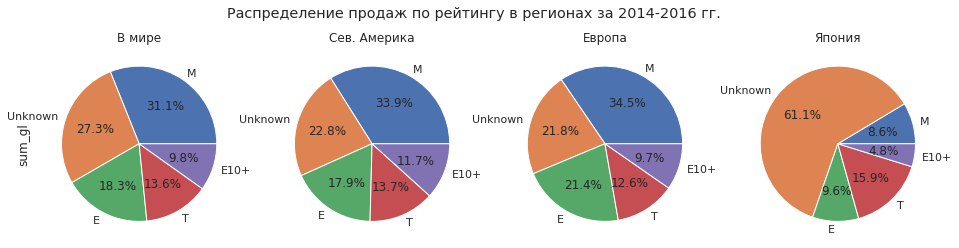

In [217]:
#fig, ax = plt.subplots(1, 4, figsize=(8,8))
sns.set()
top_rating_sales.plot(
    kind='pie', 
    subplots=True,
    sharey=True,
    sharex=True,
    figsize=(16,4),
    layout=(1,4),
    legend=False,
    autopct='%1.1f%%', 
    title = ['В мире', 'Сев. Америка', 'Европа', 'Япония'],
)
plt.suptitle('Распределение продаж по рейтингу в регионах за 2014-2016 гг.')
plt.ylabel('')
#plt.legend(loc='upper left')
plt.show()

Рейтинг M (Mature) — «Для взрослых от 17 лет» превалирует в Европе и Сев. Америке, но не в Японии. Там больше 60% продаж относятся к данным с неизвестным рейтингом. А среди известных на 1-м месте в Японии рейтинг T (Teen) — «Подросткам от 13 лет» 

На неизвестный рейтинг в Европе и Сев. Америке приходится по чуть более 20%. Это говорит о том, что пропусков в рейтинге было больше допущено именно в популярных в Японии играх.

E (Everyone) идет на 2-м месте во всех регионах. В Европе он немного опережает Сев. Америку. На 3-м месте рейтинг T (Teen) — «Подросткам от 13 лет», хотя в Японии этот рейтинг идет на 2-м месте и почти вровень с E (Everyone). На последнем месте по популярности рейтинг E10+ (Everyone 10 and older) — «от 10 лет и старше». 

Поэтому можно сказать, влияние рейтинга на продажи в Европе и Сев. Америке почти одинаковое и существенно отличается от Японии, хотя там пропусков более 60%, и они явно смещены в сторону популярности в именно в этом регионе.

### Выводы

Для пользователя каждого региона (NA, EU, JP):

* **Самые популярные платформы (топ-5):**

In [163]:
top_platform_sales.index.tolist()

['PS4', 'XOne', '3DS', 'PS3', 'X360']

В Европе превалируют платформа PS4 (наибольшая глобальная популярность) и XOne, в Сев. Америке - PS4, XOne и X360, а в Японии - 3DS, PS4 и PSV. Причем PS4 в Европе обгоняет Сев.Америку, а XOne и X360 - наоборот. 3DS - абсолютный лидер в Японии. В целом платформы Sony выигрывают по попопулярности у Microsoft. Рынок видеоигр Сев. Америки примерно равен европейскому.

* **Самые популярные жанры (топ-5):**

In [164]:
top_genre_sales.index.tolist()

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

Жанры Action и Shooter - самые популярные жанры в Европе, Сев. Америке и в мире вцелом, жанры Sports и Role-Playing значительно уступают. В Японии картина несколько иная - здесь превалирует жанр Role-Playing, а Action лишь на 2-м месте по популярности, все остальные значительно уступают.

* **Влияние рейтинга ESRB на продажи в отдельном регионе**

In [165]:
top_rating_sales.index.tolist()

['M', 'Unknown', 'E', 'T', 'E10+']

Рейтинг M (Mature) — «Для взрослых от 17 лет» превалирует в Европе и Сев. Америке, но не в Японии. Там больше 60% продаж относятся к данным с неизвестным рейтингом. А среди известных на 1-м месте в Японии рейтинг T (Teen) — «Подросткам от 13 лет»

На неизвестный рейтинг в Европе и Сев. Америке приходится по чуть более 20%. Это говорит о том, что пропусков в рейтинге было больше допущено именно в популярных в Японии играх.

E (Everyone) идет на 2-м месте во всех регионах. В Европе он немного опережает Сев. Америку. На 3-м месте рейтинг T (Teen) — «Подросткам от 13 лет», хотя в Японии этот рейтинг идет на 2-м месте и почти вровень с E (Everyone). На последнем месте по популярности рейтинг E10+ (Everyone 10 and older) — «от 10 лет и старше».

Поэтому можно сказать, влияние рейтинга на продажи в Европе и Сев. Америке почти одинаковое и существенно отличается от Японии, хотя там пропусков более 60%, и они явно смещены в сторону популярности в именно в этом регионе.

## Проверка гипотез

Будем проверять 2 гипотезы:
* **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**
* **Средние пользовательские рейтинги жанров Action и Sports разные.**

Пороговое значение alpha зададим на уровне 1%.

Поясним:
* как формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

### Гипотеза 1

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковы**

Нам следует принять за нулевую гипотезу Н0 гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC (нулевая гипотеза всегда утвержадет равенство), и как альтернативную гипотезу Н1 - гипотезу о их неравенстве. Критерием, по которому будем судить о гипотезе поставим в 1% вероятности получить ошибку первого рода, то есть отклонить нулевую гипотезу, когда на самом деле стат. значимых различий нет.

In [166]:
# Исходная таблица (срез df_good с 2014 г.)

df_good = df_good[df_good['year_of_release'] >= 2014].copy()

df_good

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


Получим две выборки пользовательских рейтингов платформ Xbox One и PC

In [167]:
xone_user_score = df_good[df_good['platform'].isin(['XOne']) & (df_good['user_score'].notna())]['user_score'].copy()

In [168]:
pc_user_score = df_good[df_good['platform'].isin(['PC']) & (df_good['user_score'].notna())]['user_score'].copy()

Сравним дисперсии

In [169]:
print(xone_user_score.var())
print(pc_user_score.var())

1.8910066518847013
2.901154315133451


Дисперсии различаются незначительно

In [170]:
print(xone_user_score.describe(), '\n')
print(pc_user_score.describe())

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64 

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64


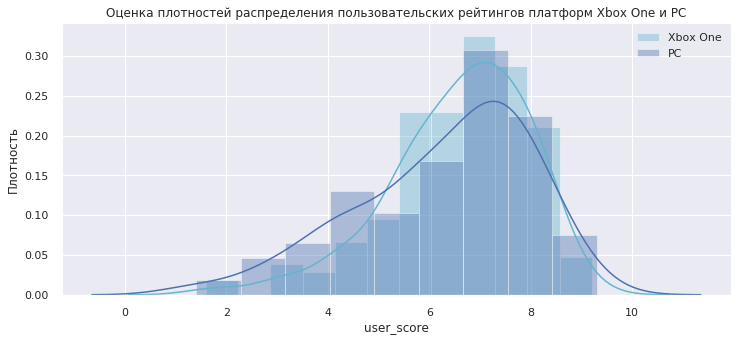

In [171]:
fig, ax = plt.subplots(figsize=(12,5))

sns.distplot(xone_user_score, kde=True, color='c')
sns.distplot(pc_user_score, kde=True, color='b')

plt.title('Оценка плотностей распределения пользовательских рейтингов платформ Xbox One и PC')
plt.legend(['Xbox One', 'PC'])
plt.ylabel('Плотность')
plt.show()

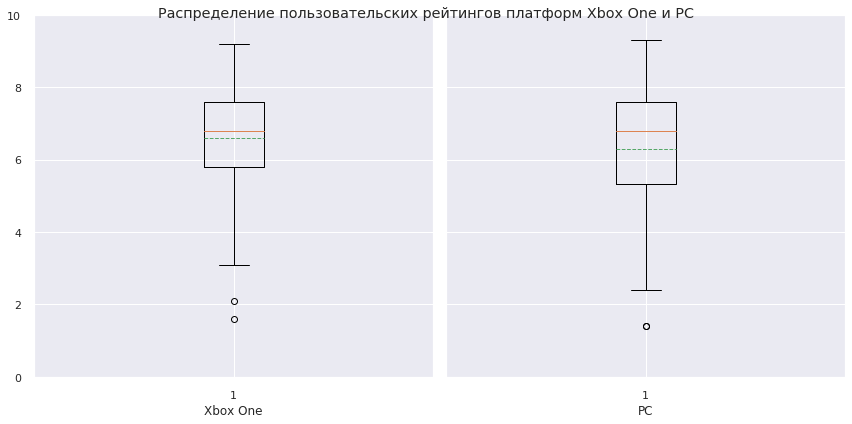

In [221]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True, tight_layout=True)
fig.suptitle('Распределение пользовательских рейтингов платформ Xbox One и PC')

ax[0].boxplot(xone_user_score, meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)
ax[0].set(xlabel='Xbox One')

ax[1].boxplot(pc_user_score, meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)
ax[1].set(xlabel='PC')

plt.ylim(0, 10)
plt.show()

Выборки распределены достаточно близко к нормальному, а дисперсии конечны. Проведем t-test. Воспользуемся методом нахождения t-критерия Стьюдента о равенстве средних двух совокупностей по их репрезентативным выборкам

In [173]:
alpha = .01 # Примем уровень значимости равным 1%  

# Применим метод ttest_ind() для двух независимых совокупностей

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=True)  

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Недостаточно оснований отвергнуть нулевую гипотезу')

p-значение 0.10450507919348415
Недостаточно оснований отвергнуть нулевую гипотезу


По принятому критерию в 1% вероятности получить ошибку первого рода не можем отвергнуть нулевую гипотезу H0 и принять альтернативную гипотезу Н1 о неравенстве средних пользовательских оценок платформ Xbox One и PC.

### Гипотеза 2

**Средние пользовательские рейтинги жанров Action и Sports разные**

Нам следует принять за нулевую гипотезу Н0 гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, и как альтернативную гипотезу Н1 - гипотезу о их неравенстве. Критерием, по которому будем судить о гипотезе поставим в 1% вероятности получить ошибку первого рода, то есть отклонить нулевую гипотезу, когда на самом деле стат. значимых различий нет.

Получим две выборки пользовательских рейтингов жанров Action и Sports

In [174]:
action_user_score = df_good[(df_good['genre'].isin(['Action'])) & (df_good['user_score'].notna())]['user_score']
sports_user_score = df_good[(df_good['genre'].isin(['Sports'])) & (df_good['user_score'].notna())]['user_score']

Сравним дисперсии

In [175]:
print(action_user_score.var())
print(sports_user_score.var())

1.8984766584766581
3.446979127609048


Дисперсии различаются незначительно

In [176]:
print(action_user_score.describe(), '\n')
print(sports_user_score.describe())

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64 

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64


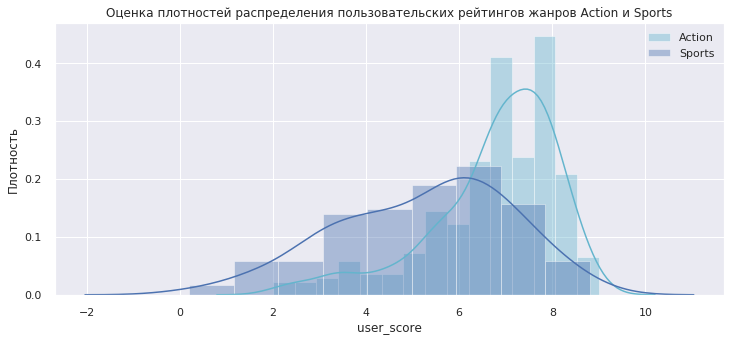

In [177]:
fig, ax = plt.subplots(figsize=(12,5))

sns.distplot(action_user_score, kde=True, color='c')
sns.distplot(sports_user_score, kde=True, color='b')

plt.title('Оценка плотностей распределения пользовательских рейтингов жанров Action и Sports')
plt.legend(['Action', 'Sports'])
plt.ylabel('Плотность')
plt.show()

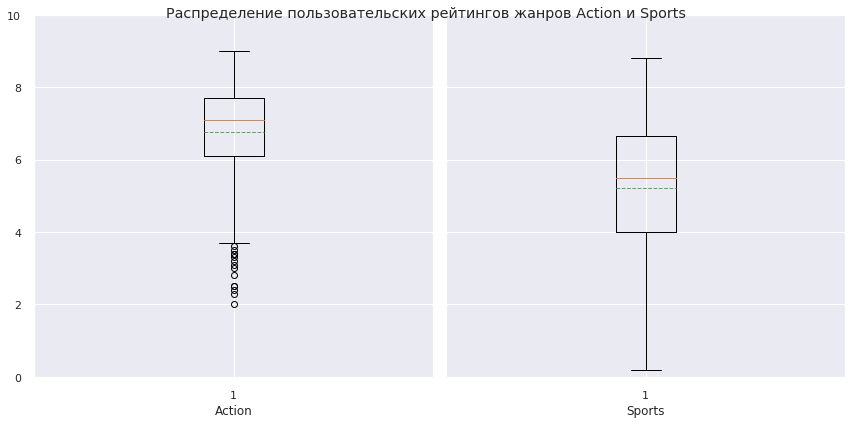

In [178]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True, tight_layout=True)
fig.suptitle('Распределение пользовательских рейтингов жанров Action и Sports')

ax[0].boxplot(action_user_score, meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)
ax[0].set(xlabel='Action')

ax[1].boxplot(sports_user_score, meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True)
ax[1].set(xlabel='Sports')

plt.ylim(0, 10)
plt.show()

Выборки распределены достаточно близко к нормальному, а дисперсии конечны. Проведем t-test. Воспользуемся методом нахождения t-критерия Стьюдента о равенстве средних двух совокупностей по их репрезентативным выборкам

In [179]:
alpha = .01 # Примем уровень значимости равным 1%  

# Применим метод ttest_ind() для двух независимых совокупностей

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=True)  

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Недостаточно оснований отвергнуть нулевую гипотезу')

p-значение 2.8711147985105864e-19
Отвергаем нулевую гипотезу


По принятому критерию в 1% вероятности получить ошибку первого рода вынуждены отвергнуть нулевую гипотезу H0 и принять альтернативную гипотезу Н1 о неравенстве средних пользовательских оценок жанров Action и Sports.

### Выводы

По выдвинутым гипотезам были получены следующие результаты с уровнем статистической значимости 1%:

* **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - принята;**

*Альтернативная гипотеза о различии средних пользовательских рейтингов платформ Xbox One и PC была принята, т.к. нулевая гипотеза об их равенстве была отвергнута.*

* **Средние пользовательские рейтинги жанров Action и Sports разные - принята.**

*Альтернативная гипотеза о различии средних пользовательских рейтингов жанров Action и Sports была принята, т.к. нулевая гипотеза об их равенстве была отвергнута.*

Вследствие того, что выборки были распределены достаточно близко к нормальному, а дисперсия конечна, применен t-test - метод нахождения t-критерия Стьюдента о равенстве средних двух совокупностей по их репрезентативным выборкам.

## Общие выводы

* Выявленные в данных проблемы подробно описаны 
* Датасет тщательно подготовлен к анализу 
* Построены гистограммы праспределения случайных величин, коробчатые диаграммы и диаграммы рассеивания. Даны пояснения результатов
* Стандартное отклонение и дисперсия рассчитаны
* Сформулированы альтернативные и нулевые гипотезы
* Для проверки гипотез применен t-test - метод нахождения t-критерия Стьюдента о равенстве средних двух совокупностей по их репрезентативным выборкам.
* Результат проверки гипотезы был адекватно интерпретирован
* Структура проекта соблюдалась, аккуратность кода поддерживалась
* Выводы сформулированы после каждого раздела
* Оставлены комментарии практически ко всем шагам

Что мы получили на каждом из шагов:
1. Шаг
* Данные загрузили, открыли и ознакомились с общей информацией: 
* явных дубликатов не обнаружили, а значительные пропуски (почти половина) нашли в оценках пользователей и критиков, а также в рейтингах. 
* заметили, что оценках пользователей и ретингах - почти одинаковое. Незначительные пропуски - в годе выпуска игры.
2. Шаг
* Заменили названия столбцов (привели к нижнему регистру). 
* Добавили столбец total_sales - суммарные продажи. 
* Нашли и удалили один неявный дубликат. 
* Были обработаны пропуски: 
* в name, genre и year_of_release удалены вследствие малого количества и невозможности восполнить данные, 
* частично в user_score и critic_score за счет взаимного заполнения медианами по группировкам платформ, рейтингов и жанров,
* rating -  К-Е переведен в Е как устаревший, пропускам присвоено значение Unknown, чтобы иметь возможность в дальнейшем лучше оперировать такими данными. Оставшиеся пропуски решили учитывать в вопросах, не связанных с рейтингами и оценками.
3. Шаг
* На основании данных период с 1980 по 1995 годы решили считать статистически незначительным. 
* На основании диаграммы динамики продаж игр на 12 самых продаваемых платформах оценили характерную длительность жизненного цикла платформы. 
* Характерный срок появления новых и исчезновения старых платформ, который составил примерно 3 года, решили считать актуальным для прогнозов на 2017 год. 
* Оценили какие платформы лидируют по продажам, растут и падают. Выбрали несколько потенциально прибыльных платформ. Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. В результате увидели сильный разброс продаж и высокий показатель медианы у PS3 и X360, что говорит об относительной популярности, средний у PS4, XOne и WiiU, и очень незначительный у PSV, 3DS и PC. Показатели платфоры PC и PSV говорят об их стабильности. PS4 (самая молодая платформа) и X360 набирают популярность. Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
* Сделали вывод, что оценка критиков весомо влияет на продажи, а оценка пользователей нет. 
* Построили распределение количества игр и продаж по жанрам. Выделили жанры с высокими и низкими продажами. В Топ-5 жанров, где игры стабильно пользуются спросом: Platform, Shooter, Sports, Fighting и Action. Самые плохие продажи в Puzzle, Strategy и Adventure. Жанры с высокими и низкими продажами явно выделяются.
4. Шаг
* Составили портрет пользователя каждого региона. Для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5): PS4, XOne, 3DS, PS3, X360. В Европе превалируют платформа PS4 (наибольшая глобальная популярность) и XOne, в Сев. Америке - PS4, XOne и X360, а в Японии - 3DS, PS4 и PSV. В целом платформы Sony выигрывают по попопулярности у Microsoft. 
* Самые популярные жанры (топ-5): Action, Shooter, Sports, Role-Playing, Misc. Жанры Action и Shooter - самые популярные жанры в Европе, Сев. Америке и в мире в целом, жанры Sports и Role-Playing значительно уступают. В Японии картина несколько иная - здесь превалирует жанр Role-Playing, а Action лишь на 2-м месте по популярности, все остальные значительно уступают.
* Изучили влияние рейтинга ESRB на продажи в отдельном регионе: M, Unknown, E, T, E10+. Рейтинг M (Mature) — «Для взрослых от 17 лет» превалирует в Европе и Сев. Америке, но не в Японии. Среди известных на 1-м месте в Японии рейтинг T (Teen) — «Подросткам от 13 лет». На неизвестный рейтинг в Европе и Сев. Америке приходится по чуть более 20%. Это говорит о том, что пропусков в рейтинге было больше допущено именно в популярных в Японии играх. E (Everyone) идет на 2-м месте во всех регионах. В Европе он немного опережает Сев. Америку. На 3-м месте рейтинг T (Teen) — «Подросткам от 13 лет», хотя в Японии этот рейтинг идет на 2-м месте и почти вровень с E (Everyone). На последнем месте по популярности рейтинг E10+ (Everyone 10 and older) — «от 10 лет и старше». Поэтому можно сказать, влияние рейтинга на продажи в Европе и Сев. Америке почти одинаковое и существенно отличается от Японии, хотя там пропусков более 60%, и они явно смещены в сторону популярности в именно в этом регионе.
5. Шаг
* По выдвинутым гипотезам были получены следующие результаты с уровнем статистической значимости 1%:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не принята;
* Средние пользовательские рейтинги жанров Action и Sports разные - принята.

Оющий итог: 

По состоянию на 2016 год можно сделать следующий прогноз для построения рекламной стратегии в видеоигровой индустрии:

* для Европы и Сев. Америки наибольшим потенциалом обладают платформа PS4, жанр Action, рейтинг М. 
* для Японии - платформа 3DS, жанр Role-Playing, рейтинг T (хотя для определния популярного рейтинга в Японии слишком много пропусков в данных)